# REIT ETFs Price Prediction

## I. Overview
This project uses a regression model for forecasting future prices and a classification model to predict the trend for REIT ETFs. The historical data acquired from Yahoo Finance contains up-to-date price information. Potential investors can use my models to predict both future prices and trends.

## II. Business Problem
### Motivation
Invest in real estate over long term could offer a reliable stream of income. This could also offer the benefit of tax reduction, direct ownership, potential growth of net worth, and so on. But those benefits come with a lot of hands-on responsibilities. Invest in REIT ETFs (Real Estate Investment Trust Exchange-Traded Funds) offer a low investment requirement and hands-off (but less control) way to earn dividends quarterly by purchasing baskets of stocks.

***

### Goal
Predict future price and trend through machine learning.


## III. Data Understanding
The historical price data from [Yahoo Finance](https://finance.yahoo.com/) are free to acquire through [yfinance API](https://pypi.org/project/yfinance/). Here, I focused on [Top 28 REIT ETFs](https://etfdb.com/etfdb-category/real-estate/) for further analysis. The last date for all ETFs was 06/23/2021.

### Jupyter Notebook Instruction
In the Github repository, there is a "notebook" folder. Follow by the order:
1. Fetch_Data.ipynb
    - The main purpose of this notebook is to fetch mutiple REIT ETFs' historical data from Yahoo Finance and combine them into a single dataframe
    - The data set contains `OHLC` (Open, High, Low, Close), `Volume`, `Dividends`, `Stock Splits` and `Ticker`
2. ARIMA.ipynb
    - An ARIMA model was built for VNQ
    - Train-Val-Test split
        - Train set was used for training the model
        - Validation set was used for checking the model performance after ML
        - Test set was only used once for checking the model performance on unseen data
3. FBProphet.ipynb
    - A FBProphet model was built for VNQ
    - (Due to the nature of FBProphet, data split is slightly different than other models)
    - Train-Test Split
        - Train set was used for training the model
        - Test set was only used once for checking the model performance on unseen data
    
4. LSTM.ipynb
    - A LSTM model was built for VNQ
    - Train-Val-Test split
        - Train set was used for training the model
        - Validation set was used for tuning the model
        - Test set was only used once for checking the model performance on unseen data
5. Classification.ipynb
    - <b>nusvc_clf</b>, the best model, was selected among 9 differnent classfiers for VNQ
    - Train-Val-Test split
        - Train set was used for training the model
        - Validation set was used for tuning the model
        - Test set was only used once for checking the model performance on unseen data


### Note
- For convinence, there is a py file which contains pre-written functions
- Both regression and classification models are built on <b>VNQ</b>
- Full detail on how to tune the model can be viewed in the corresponding notebook



### Regression Results for Test Set
|  Model | MAE | RMSE | R2 | Choice |
| :---: | :---: |:---: | :---: |:---: | 
| ARIMA | 4.6429 | 5.0535 | -4.9348 |  |
| FBProphet | 14.0614 | 14.1760 | -51.0399 |  |
| LSTM | 0.7419 | 0.9534 | 0.7756 | ✓ |

- LSTM is the best regression model for forecating future's prices

### Classification Results for Test Set
|  Model | Accuracy | ROC-AUC | F1 (0) | F1 (1) |
| :---: | :---: |:---: | :---: |:---: | 
| NuSVC | 0.9091 | 0.9500 | 0.90 | 0.92 |


- NuSVC is the best classifier for predicting future's trend

## IV. Google Colab Setup

In [9]:
# util.py has pmdarima function inside
# Need to install it before import the pyfile
# !pip install pmdarima

In [3]:
# Google Colab
from google.colab import drive
import os

# General
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pickle import dump, load

# Scikit-Learn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Plotly
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# Mount Google Drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [5]:
# Get the current working directory
print(os.getcwd())

/content


In [6]:
# Drive path is the path where I upload the ETFs history file and pre-written pyfile
drive_path_csv = '/gdrive/MyDrive/Capstone_Project/REIT_ETFs.csv'
drive_path_util = '/gdrive/MyDrive/Capstone_Project/util.py'
# drive_path_lstm = '/gdrive/MyDrive/Capstone_Project/lstm.h5'
# drive_path_nusvc = '/gdrive/MyDrive/Capstone_Project/nusvc.pkl'

# Expect to move these file into the local path
local_path = '/content'

In [7]:
# Copy these file in drive path
!cp '{drive_path_csv}' .
!cp '{drive_path_util}' .
# !cp '{drive_path_lstm}' .
# !cp '{drive_path_nusvc}' .

# Change these file from drive path to the local path
os.chdir(local_path)

In [8]:
# Pre-written function
import util as ut

## V. Preprocessing

In [8]:
data = pd.read_csv('/content/REIT_ETFs.csv')
data

Date       Open       High  ...  Dividends  Stock Splits  Ticker
0      2004-09-29  23.794544  23.861371  ...        0.0           0.0     VNQ
1      2004-09-30  23.866143  24.023660  ...        0.0           0.0     VNQ
2      2004-10-01  24.033207  24.462799  ...        0.0           0.0     VNQ
3      2004-10-04  24.529629  24.606000  ...        0.0           0.0     VNQ
4      2004-10-05  24.534403  24.582135  ...        0.0           0.0     VNQ
...           ...        ...        ...  ...        ...           ...     ...
53434  2021-06-17   9.280000   9.290000  ...        0.0           0.0     REK
53435  2021-06-18   9.330000   9.370000  ...        0.0           0.0     REK
53436  2021-06-21   9.320000   9.320000  ...        0.0           0.0     REK
53437  2021-06-22   9.160000   9.230000  ...        0.0           0.0     REK
53438  2021-06-23   9.200000   9.260000  ...        0.0           0.0     REK

[53439 rows x 9 columns]

In [59]:
fig = px.area(data, x='Date', y='Close', facet_col="Ticker", color="Ticker",
              facet_col_wrap=3, height=1000, width=1000)
fig.show()

In [57]:
fig2 = px.line(data, x='Date', y='Close', facet_col="Ticker", color="Ticker",
              facet_col_wrap=3, height=1000, width=1000)
fig2

In [9]:
# Put all tickers in a list
ticker = [x for x in data['Ticker'].unique()]
ticker

['VNQ',
 'IYR',
 'SCHH',
 'ICF',
 'USRT',
 'RWR',
 'REM',
 'REZ',
 'KBWY',
 'MORT',
 'PSR',
 'FRI',
 'ROOF',
 'RDOG',
 'REK']

In [10]:
def xy_split_reg (dataset, timestep):
    '''
    (Regression)

    Split the time series into X and y part based on the number of timestep.
    Ex. Use n days to predict the next preceding day (n+1) price.
    
    -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

    Inputs:
    - dataset: Time series data
    - timestep: number of days in integer
    
    Return: 
    - X_part, y_part (in arrays)
    '''
    
    X_part, y_part = [], []
    
    for i in range(len(dataset)-timestep-1):
         
        X_part.append(dataset[i:(i+timestep)])

        y_part.append(dataset[i+timestep])

    return np.array(X_part), np.array(y_part)



def xy_split_class(dataset):
    '''
    (Classification)

    Split the dataset into X-part and y-part(label).

    -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
    
    Input:
    - dataset: Time series data

    Return:
    - X_part, y_part
    
    '''

    X = dataset.drop(columns=['Trend'], axis=1)
    y = dataset['Trend']

    return X, y

## VI. Modeling

In [49]:
def etf_reg(ticker_name):
    '''
    (Regression)

    Create a sub-df from select ticker. Preprocessed the sub-df and use LSTM model
    on test set to predict the future price. Evaluate the test result.

    -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
    
    Input:
    - ticker_name: 3-letters capital symbol

    Output:
    - Preprocessed df, time series plot, LSTM test prediction result with MAE, RMSE, R2, and plot
    
    '''

    # Create a sub df for selected ticker
    etf = data.copy().loc[data['Ticker'] == ticker_name]
    
    # Use pre-defined function to set the "Date" as index in datetime64
    ut.preprocess_df(etf)

    # Plot the time series
    ut.visualize_time_series(etf['Close'], ticker_name)

    # Train test split (Note: train set is for the scaler!)
    train = etf['Close'].iloc[:-275]
    test = etf['Close'].iloc[-22:]

    # Instantiate the scaler    
    scaler = MinMaxScaler()

    # Scale
    train_scale = scaler.fit_transform(train.values.reshape(-1,1))
    test_scale = scaler.transform(test.values.reshape(-1,1))

    # Split the test set into X, y part
    X_test, y_test = xy_split_reg(test_scale, timestep=1)

    # Load the best LSTM model
    best = load_model('/content/f250.h5')

    # Make prediction on the holdout test set
    y_test_pred = best.predict(X_test)

    # Inverse transform the test prediction and actual
    y_test_inv = scaler.inverse_transform(y_test_pred) # pred
    y_test_true = scaler.inverse_transform(y_test)     # actual


    # Evaluate MAE, RMSE, and R2
    ut.evaluate(y_test_true, y_test_inv)

    # Plot test result
    ut.lstm_plot_prediction(y_test_true, y_test_inv)

   


def etf_class(ticker_name):
    '''
    (Classification)

    Create a sub-df from select ticker. Preprocessed the sub-df and use NuSVC model
    on test set to predict the future trend. Evaluate the test result.

    -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
    
    Input: 
    - ticker_name: 3-letters capital symbol
    
    Output:
    - Preprocessed df, NuSVC test prediction with accuracy, roc-auc, classification report, confusion matrix and roc-curve

    '''   

    # Create a sub df for selected ticker
    etf = data.copy().loc[data['Ticker'] == ticker_name]
    
    # Drop unecessary columns
    etf.drop(columns=['Volume', 'Dividends', 'Stock Splits', 'Ticker'], inplace=True)
    
    # Shift index by 1 period => lag-1
    etf['Lag 1'] = etf['Close'].shift(periods=1)
    
    # Find the difference between closing price and lag-1
    etf.loc[etf['Close'] - etf['Lag 1'] > 0, 'Trend'] = 'up'
    etf.loc[etf['Close'] - etf['Lag 1'] <= 0, 'Trend'] = 'down'
    
    # Drop unecessary column and the 1st row (which has null value)
    etf.drop(columns=['Lag 1'], inplace=True)
    etf.drop(etf.index.min(), inplace=True)
    
    # Use pre-defined function to set the "Date" as index in datetime64
    ut.preprocess_df(etf)

    # Label Encoding
    label_encoder = LabelEncoder()
    etf['Trend']= label_encoder.fit_transform(etf['Trend'])
    
    # Split the data
    test = etf.iloc[-22:]
    X_test, y_test = xy_split_class(test)

    # Load the best NuSVC classifier
    best = load(open('/content/nusvc.pkl', 'rb'))


    # Evaluate accuracy, roc-auc score, classification report, confusion matrix and roc-curve
    ut.class_evaluate(best, X_test, y_test, use_decision_function='yes')
    

    

def etf():
    '''
    Manually input ticker name from given list and call regression and classification functions

    -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
    
    Input:
    - symbol from given list

    Output:
    - regression result and classification result on test set

    '''
    
    print("Select one REIT ETF from the following list: \n")
    for i in range(0,15):
        print(f"{i+1}. {ticker[i]}")  # ticker list

    print("\n")
    ticker_name = input("Which REIT ETF do you want to predict? \n").upper()

    reg_result = etf_reg(ticker_name)
    class_result = etf_class(ticker_name)
    
    # return reg_result, class_result

### VNQ

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
vnq
This dataframe's index is in datatime64? True


Open     High      Low  ...  Dividends  Stock Splits  Ticker
Date                                   ...                                 
2004-09-29  23.7945  23.8614  23.7898  ...     0.0000        0.0000     VNQ
2004-09-30  23.8661  24.0237  23.8614  ...     0.0000        0.0000     VNQ
2004-10-01  24.0332  24.4628  23.9855  ...     0.0000        0.0000     VNQ
2004-10-04  24.5296  24.6060  24.5296  ...     0.0000        0.0000     VNQ
2004-10-05  24.5344  24.5821  24.5105  ...     0.0000        0.0000     VNQ
...             ...      ...      ...  ...        ...           ...     ...
2021-06-17 103.4100 103.7000 102.8600  ...     0.0000        0.0000     VNQ
2021-06-18 103.0200 103.4700 101.7900  ...     0.0000        0.0000     VNQ
2021-06-21 102.3100 104.2100 101.8000  ...     0.0000        0.0000     VNQ
2021-06-22 103.8900 104.0100 103.2800  ...     0.0000        0.0000     VNQ
2021-06-23 103.3500 103.7500 103.0800  ...     0.0000        0.0000     VNQ

[4213 rows x 8 columns]

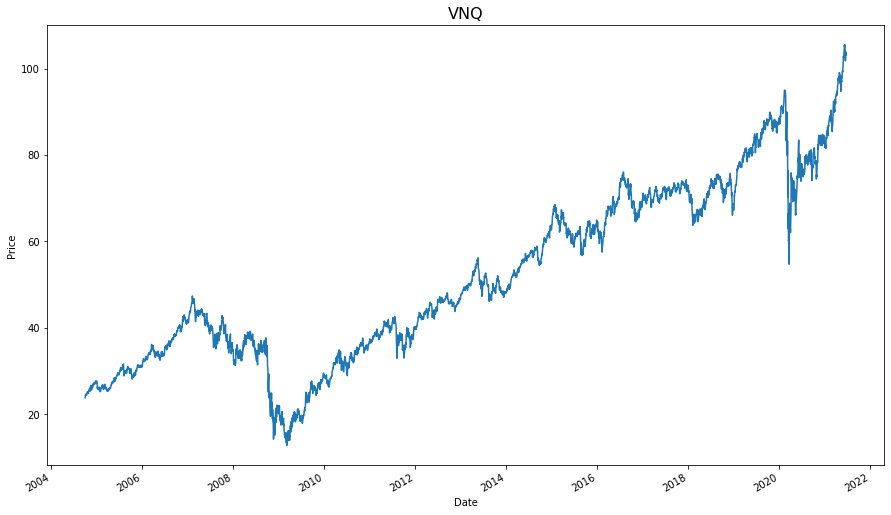

MAE: 0.7428
RMSE: 0.9558
R^2: 0.7745


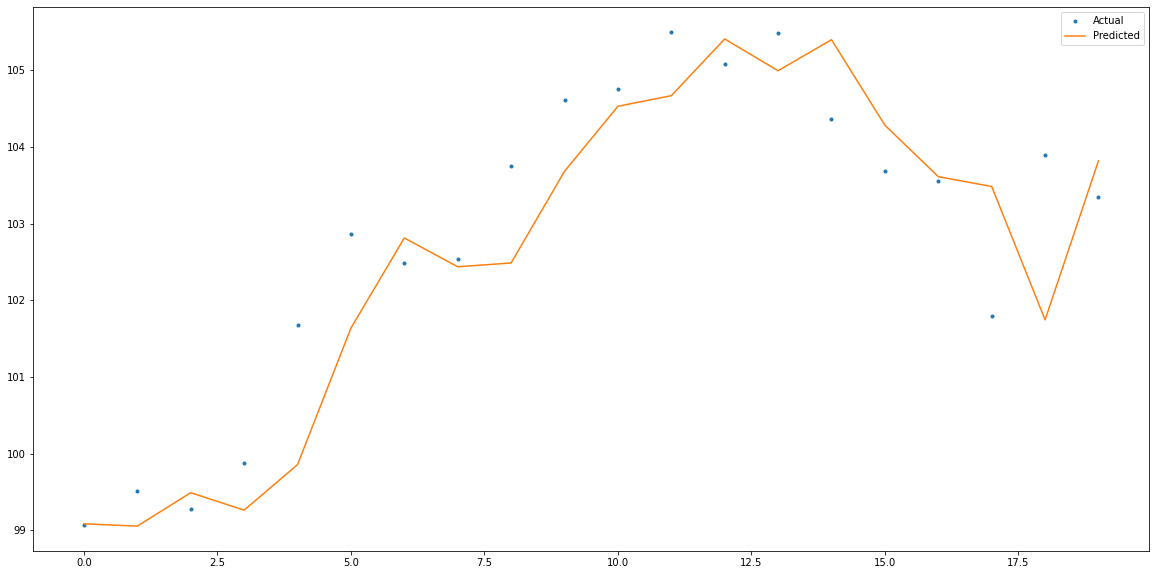

This dataframe's index is in datatime64? True


Open     High      Low    Close Trend
Date                                                
2004-09-30  23.8661  24.0237  23.8614  23.9855    up
2004-10-01  24.0332  24.4628  23.9855  24.4294    up
2004-10-04  24.5296  24.6060  24.5296  24.5344    up
2004-10-05  24.5344  24.5821  24.5105  24.5296  down
2004-10-06  24.5821  24.6442  24.5774  24.6442    up
...             ...      ...      ...      ...   ...
2021-06-17 103.4100 103.7000 102.8600 103.5500  down
2021-06-18 103.0200 103.4700 101.7900 101.7900  down
2021-06-21 102.3100 104.2100 101.8000 103.8900    up
2021-06-22 103.8900 104.0100 103.2800 103.3500  down
2021-06-23 103.3500 103.7500 103.0800 103.1700  down

[4212 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.9091
roc-auc: 0.9500
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.92      0.92      0.92        12

    accuracy                           0.91        22
   macro avg       0.91      0.91      0.91        22
weighted avg       0.91      0.91      0.91        22



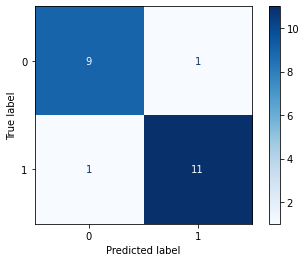

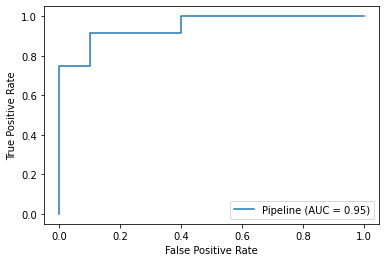

In [48]:
vnq_result = etf()

### IYR

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
iyr
This dataframe's index is in datatime64? True


Open        High         Low  ...  Dividends  Stock Splits  Ticker
Date                                            ...                                 
2000-06-19   14.495063   14.495063   14.495063  ...        0.0           0.0     IYR
2000-06-20   14.533861   14.556489   14.533861  ...        0.0           0.0     IYR
2000-06-21   14.643762   14.643762   14.627599  ...        0.0           0.0     IYR
2000-06-22   14.634065   14.634065   14.634065  ...        0.0           0.0     IYR
2000-06-23   14.634065   14.634065   14.634065  ...        0.0           0.0     IYR
...                ...         ...         ...  ...        ...           ...     ...
2021-06-17  102.720001  103.190002  102.339996  ...        0.0           0.0     IYR
2021-06-18  102.760002  102.980003  101.379997  ...        0.0           0.0     IYR
2021-06-21  101.699997  103.730003  101.459999  ...        0.0           0.0     IYR
2021-06-22  103.510002  103.540001  102.930000  ...        0.0           0.0     IYR
2021-06-23  102.919998  103.250000  102.639999  ...        0.0           0.0     IYR

[5287 rows x 8 columns]

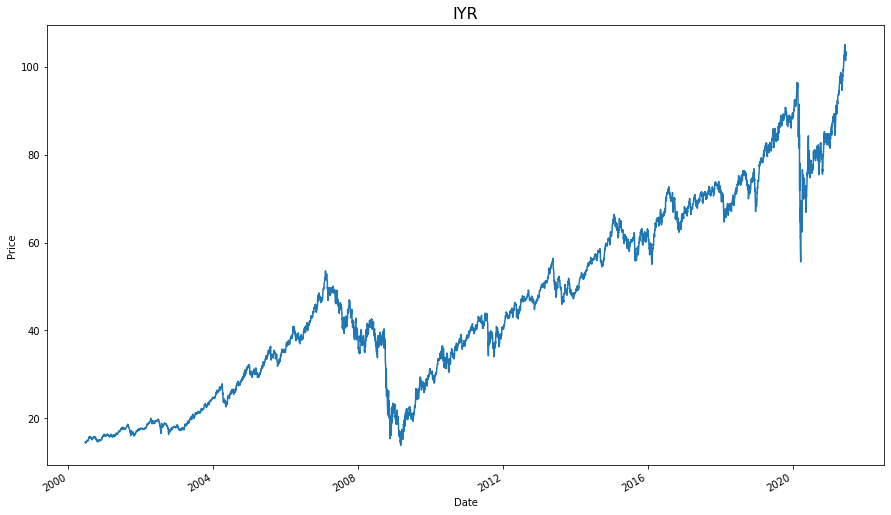

MAE: 0.7270
RMSE: 0.9093
R^2: 0.7625


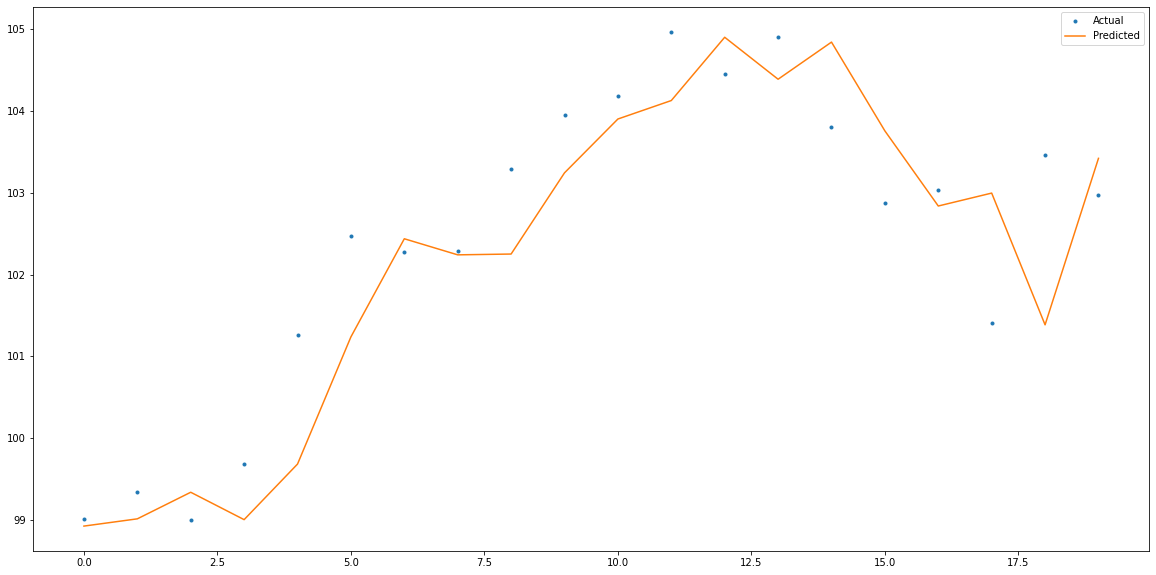

This dataframe's index is in datatime64? True


Open        High         Low       Close Trend
Date                                                            
2000-06-20   14.533861   14.556489   14.533861   14.556489    up
2000-06-21   14.643762   14.643762   14.627599   14.627599    up
2000-06-22   14.634065   14.634065   14.634065   14.634065    up
2000-06-23   14.634065   14.634065   14.634065   14.634065  down
2000-06-26   14.533857   14.533857   14.430413   14.430413  down
...                ...         ...         ...         ...   ...
2021-06-17  102.720001  103.190002  102.339996  103.040001    up
2021-06-18  102.760002  102.980003  101.379997  101.410004  down
2021-06-21  101.699997  103.730003  101.459999  103.470001    up
2021-06-22  103.510002  103.540001  102.930000  102.970001  down
2021-06-23  102.919998  103.250000  102.639999  102.699997  down

[5286 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.9545
roc-auc: 0.9821
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.93      0.96        14

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22



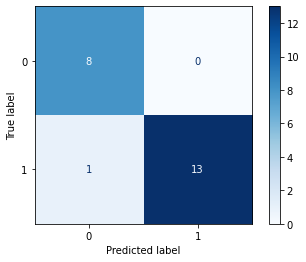

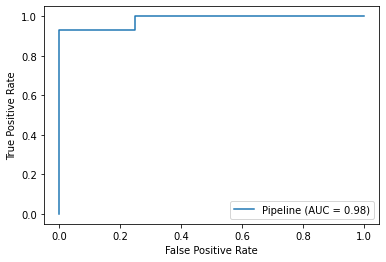

In [13]:
iyr_result = etf()

### SCHH

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
schh
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2011-01-13  19.156372  19.263051  19.125893  ...      0.000           0.0    SCHH
2011-01-14  19.209716  19.346874  19.171617  ...      0.000           0.0    SCHH
2011-01-18  19.369728  19.491646  19.278289  ...      0.000           0.0    SCHH
2011-01-19  19.522134  19.522134  19.186859  ...      0.000           0.0    SCHH
2011-01-20  19.240194  19.415451  19.209714  ...      0.000           0.0    SCHH
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  46.177091  46.326432  45.968006  ...      0.000           0.0    SCHH
2021-06-18  46.017788  46.236823  45.480150  ...      0.000           0.0    SCHH
2021-06-21  45.719098  46.535514  45.519976  ...      0.000           0.0    SCHH
2021-06-22  46.416037  46.445909  46.127309  ...      0.000           0.0    SCHH
2021-06-23  46.220001  46.330002  46.049999  ...      0.203           0.0    SCHH

[2628 rows x 8 columns]

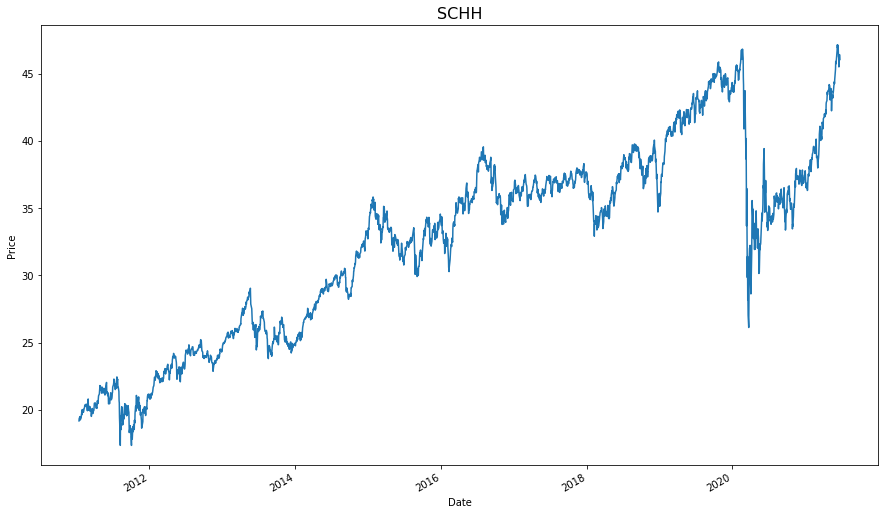

MAE: 0.3357
RMSE: 0.4200
R^2: 0.7898


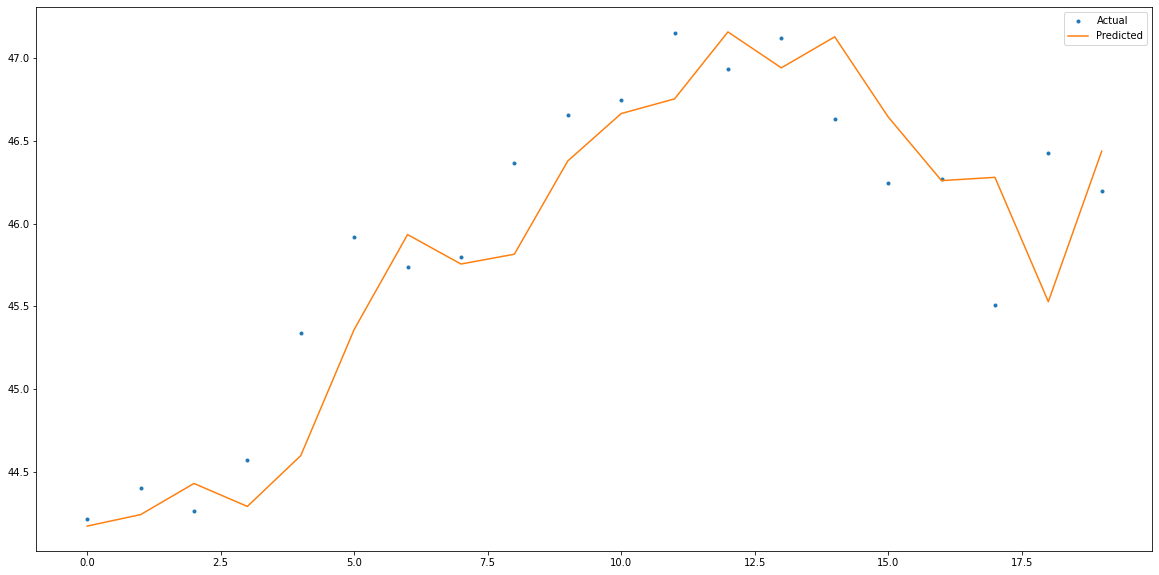

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2011-01-14  19.209716  19.346874  19.171617  19.346874    up
2011-01-18  19.369728  19.491646  19.278289  19.491646    up
2011-01-19  19.522134  19.522134  19.186859  19.240198  down
2011-01-20  19.240194  19.415451  19.209714  19.263054    up
2011-01-21  19.354482  19.430681  19.255425  19.308764    up
...               ...        ...        ...        ...   ...
2021-06-17  46.177091  46.326432  45.968006  46.266697    up
2021-06-18  46.017788  46.236823  45.480150  45.510017  down
2021-06-21  45.719098  46.535514  45.519976  46.425995    up
2021-06-22  46.416037  46.445909  46.127309  46.197002  down
2021-06-23  46.220001  46.330002  46.049999  46.060001  down

[2627 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.9091
roc-auc: 0.9911
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.93      0.93      0.93        14

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22



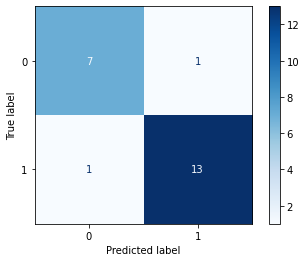

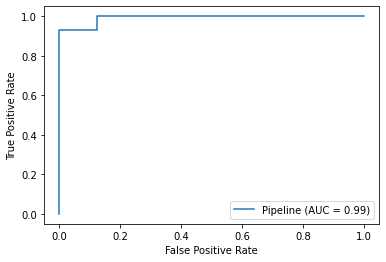

In [14]:
schh_result = etf()

### ICF

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
icf
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2001-02-02   8.887099   8.887099   8.887099  ...        0.0           0.0     ICF
2001-02-05   8.909679   8.909679   8.881886  ...        0.0           0.0     ICF
2001-02-06   8.847145   8.847145   8.847145  ...        0.0           0.0     ICF
2001-02-07   8.810665   8.810665   8.810665  ...        0.0           0.0     ICF
2001-02-08   8.772449   8.772449   8.767238  ...        0.0           0.0     ICF
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  65.459999  66.050003  65.459999  ...        0.0           0.0     ICF
2021-06-18  65.779999  66.010002  65.000000  ...        0.0           0.0     ICF
2021-06-21  65.330002  66.419998  64.910004  ...        0.0           0.0     ICF
2021-06-22  66.389999  66.389999  65.970001  ...        0.0           0.0     ICF
2021-06-23  66.129997  66.209999  65.790001  ...        0.0           0.0     ICF

[5129 rows x 8 columns]

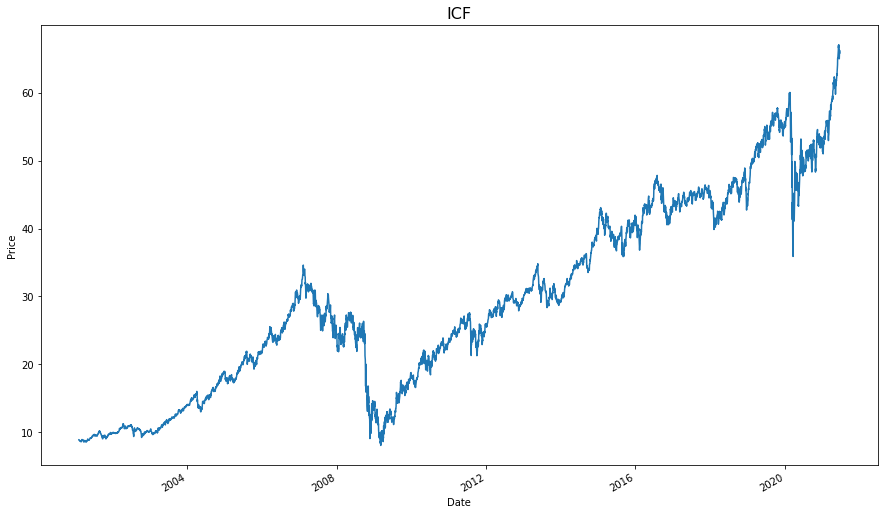

MAE: 0.4905
RMSE: 0.6060
R^2: 0.8156


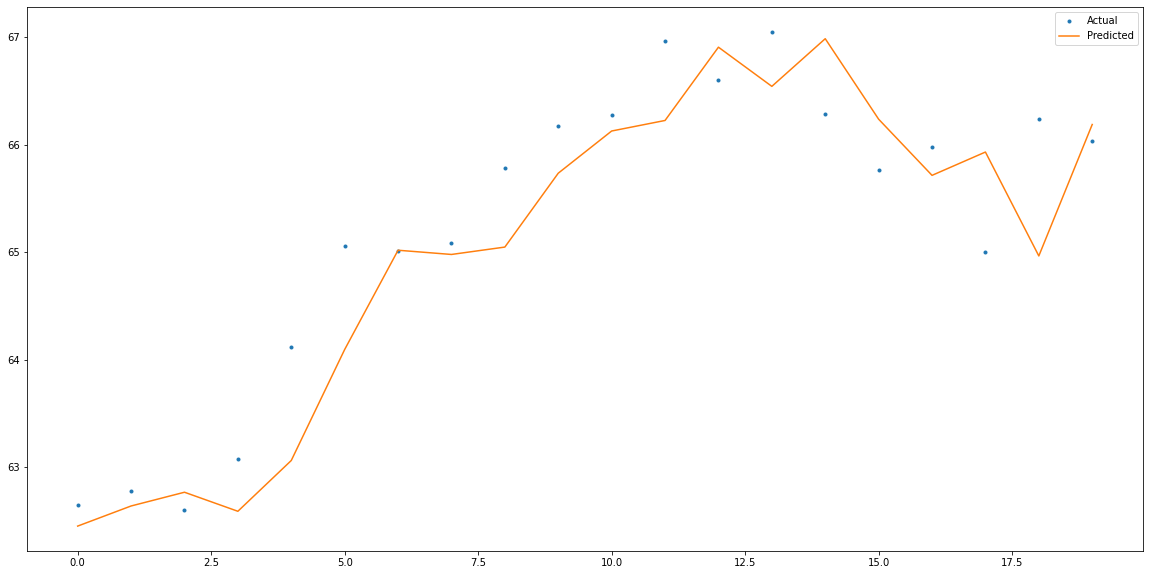

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2001-02-05   8.909679   8.909679   8.881886   8.881886  down
2001-02-06   8.847145   8.847145   8.847145   8.847145  down
2001-02-07   8.810665   8.810665   8.810665   8.810665  down
2001-02-08   8.772449   8.772449   8.767238   8.767238  down
2001-02-09   8.720334   8.720334   8.709911   8.709911  down
...               ...        ...        ...        ...   ...
2021-06-17  65.459999  66.050003  65.459999  65.980003    up
2021-06-18  65.779999  66.010002  65.000000  65.000000  down
2021-06-21  65.330002  66.419998  64.910004  66.239998    up
2021-06-22  66.389999  66.389999  65.970001  66.029999  down
2021-06-23  66.129997  66.209999  65.790001  65.849998  down

[5128 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.7727
roc-auc: 0.9554
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.91      0.71      0.80        14

    accuracy                           0.77        22
   macro avg       0.77      0.79      0.77        22
weighted avg       0.81      0.77      0.78        22



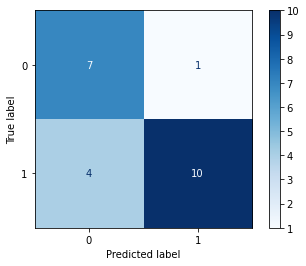

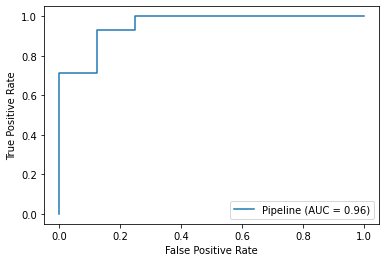

In [15]:
icf_result = etf()

### USRT

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
usrt
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2007-05-04  27.844654  27.883691  27.682929  ...        0.0           0.0    USRT
2007-05-07  27.744269  27.744269  27.721962  ...        0.0           0.0    USRT
2007-05-08  27.643887  27.643887  27.537930  ...        0.0           0.0    USRT
2007-05-09  27.878110  27.878110  27.777729  ...        0.0           0.0    USRT
2007-05-10  27.744279  27.794470  27.482172  ...        0.0           0.0    USRT
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  59.240002  59.400002  58.730000  ...        0.0           0.0    USRT
2021-06-18  58.900002  59.060001  58.070000  ...        0.0           0.0    USRT
2021-06-21  58.250000  59.520000  58.119999  ...        0.0           0.0    USRT
2021-06-22  59.410000  59.410000  58.919998  ...        0.0           0.0    USRT
2021-06-23  59.049999  59.240002  58.840000  ...        0.0           0.0    USRT

[3560 rows x 8 columns]

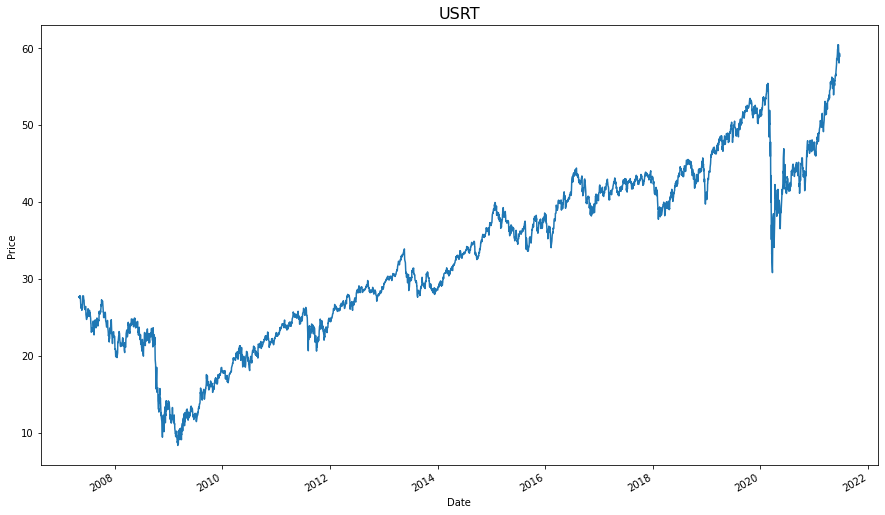

MAE: 0.4583
RMSE: 0.5822
R^2: 0.7924


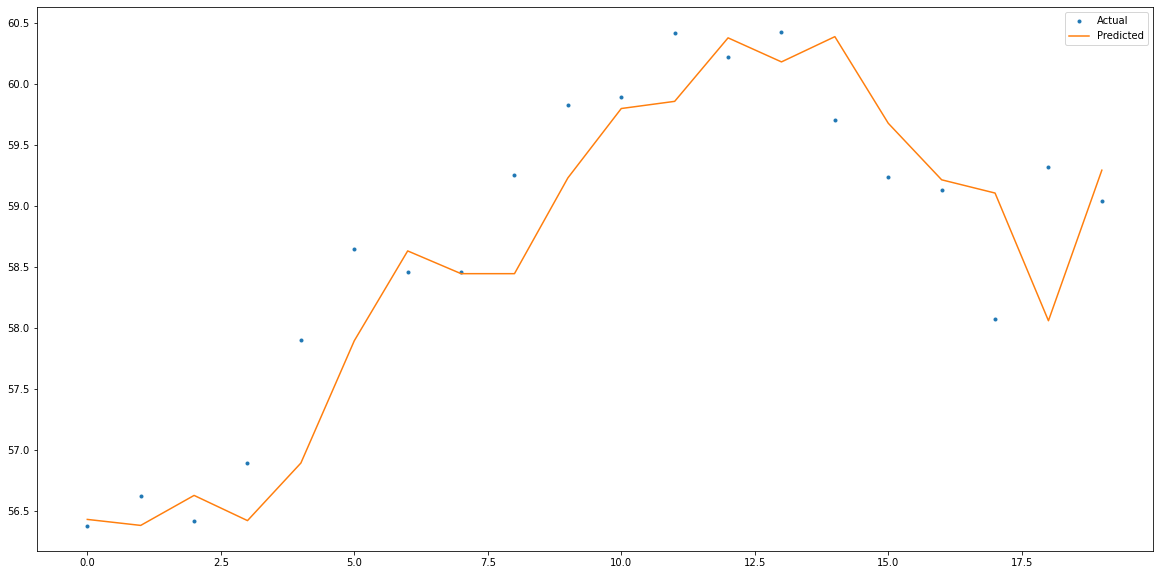

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2007-05-07  27.744269  27.744269  27.721962  27.721962    up
2007-05-08  27.643887  27.643887  27.537930  27.549084  down
2007-05-09  27.878110  27.878110  27.777729  27.777729    up
2007-05-10  27.744279  27.794470  27.482172  27.482172  down
2007-05-11  27.632731  27.833494  27.632731  27.833494    up
...               ...        ...        ...        ...   ...
2021-06-17  59.240002  59.400002  58.730000  59.130001  down
2021-06-18  58.900002  59.060001  58.070000  58.070000  down
2021-06-21  58.250000  59.520000  58.119999  59.320000    up
2021-06-22  59.410000  59.410000  58.919998  59.040001  down
2021-06-23  59.049999  59.240002  58.840000  58.970001  down

[3559 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.9545
roc-auc: 0.9917
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.91      0.95        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



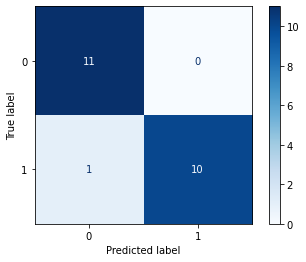

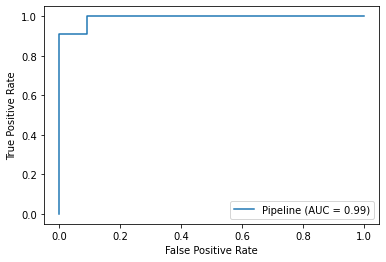

In [16]:
usrt_result = etf()

### RWR

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
rwr
This dataframe's index is in datatime64? True


Open        High         Low  ...  Dividends  Stock Splits  Ticker
Date                                            ...                                 
2001-08-27   18.938980   18.938980   18.938980  ...      0.000           0.0     RWR
2001-08-28   18.938980   18.938980   18.938980  ...      0.000           0.0     RWR
2001-08-29   18.654512   18.654512   18.522763  ...      0.000           0.0     RWR
2001-08-30   18.491325   18.491325   18.491325  ...      0.000           0.0     RWR
2001-08-31   18.447905   18.447905   18.447905  ...      0.000           0.0     RWR
...                ...         ...         ...  ...        ...           ...     ...
2021-06-17  106.289455  106.547731  105.584171  ...      0.000           0.0     RWR
2021-06-18  105.762975  106.130513  104.253065  ...      0.000           0.0     RWR
2021-06-21  104.769997  107.000000  104.510002  ...      0.697           0.0     RWR
2021-06-22  106.739998  106.739998  105.940002  ...      0.000           0.0     RWR
2021-06-23  106.120003  106.570000  106.000000  ...      0.000           0.0     RWR

[4987 rows x 8 columns]

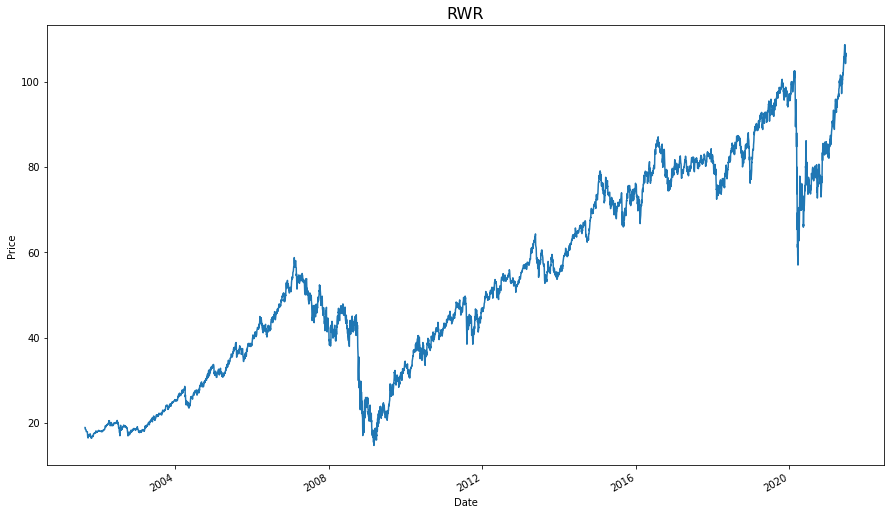

MAE: 0.8593
RMSE: 1.0842
R^2: 0.7514


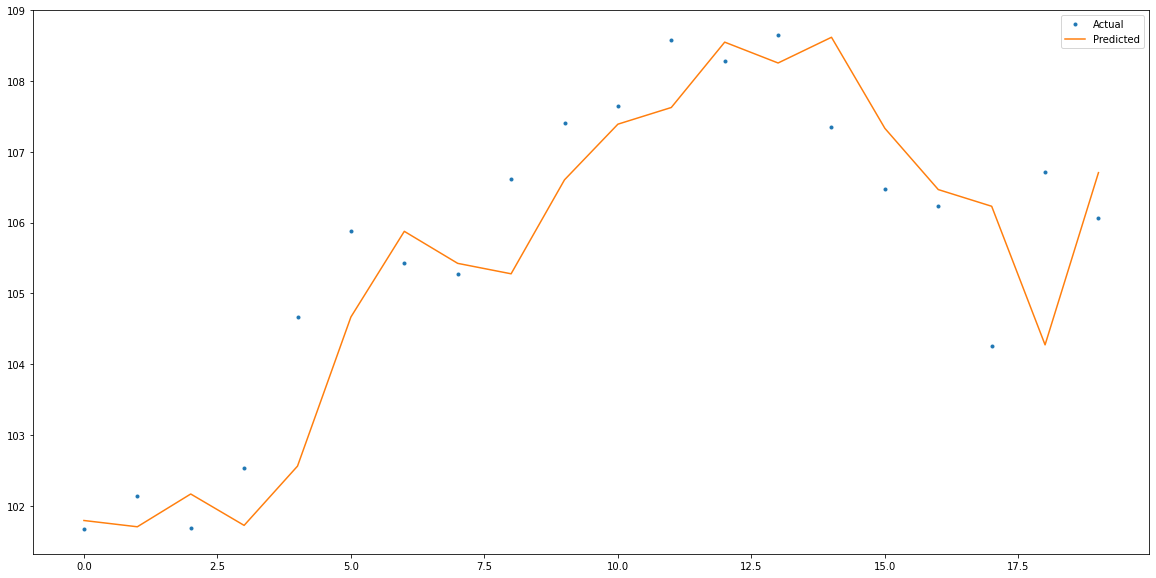

This dataframe's index is in datatime64? True


Open        High         Low       Close Trend
Date                                                            
2001-08-28   18.938980   18.938980   18.938980   18.938980  down
2001-08-29   18.654512   18.654512   18.522763   18.575163  down
2001-08-30   18.491325   18.491325   18.491325   18.491325  down
2001-08-31   18.447905   18.447905   18.447905   18.447905  down
2001-09-04   18.419460   18.419460   18.419460   18.419460  down
...                ...         ...         ...         ...   ...
2021-06-17  106.289455  106.547731  105.584171  106.239784  down
2021-06-18  105.762975  106.130513  104.253065  104.263000  down
2021-06-21  104.769997  107.000000  104.510002  106.720001    up
2021-06-22  106.739998  106.739998  105.940002  106.070000  down
2021-06-23  106.120003  106.570000  106.000000  106.110001    up

[4986 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.9545
roc-auc: 0.9917
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      1.00      0.96        12

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



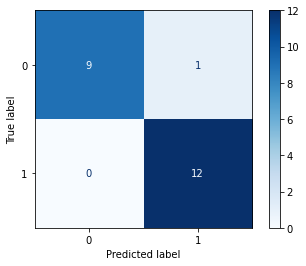

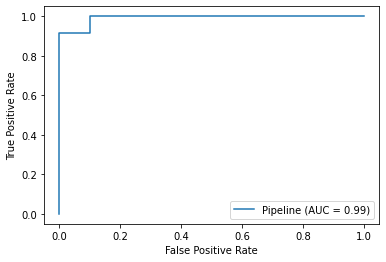

In [17]:
rwr_result = etf()

### REM

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
rem
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2007-05-04  42.258014  42.258014  42.123542  ...        0.0           0.0     REM
2007-05-07  42.232778  42.375653  42.173946  ...        0.0           0.0     REM
2007-05-08  41.921817  42.022671  41.703298  ...        0.0           0.0     REM
2007-05-09  42.224397  42.325251  42.140350  ...        0.0           0.0     REM
2007-05-10  42.300035  42.300035  41.753738  ...        0.0           0.0     REM
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  37.700001  37.849998  36.570000  ...        0.0           0.0     REM
2021-06-18  36.730000  36.810001  36.090000  ...        0.0           0.0     REM
2021-06-21  36.730000  37.279999  36.540001  ...        0.0           0.0     REM
2021-06-22  37.320000  37.320000  36.900002  ...        0.0           0.0     REM
2021-06-23  37.259998  37.470001  37.150002  ...        0.0           0.0     REM

[3560 rows x 8 columns]

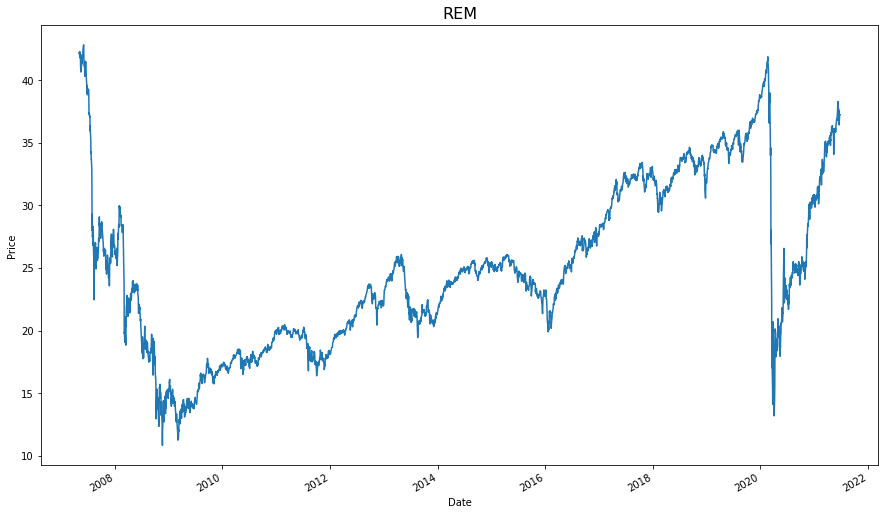

MAE: 0.3137
RMSE: 0.3766
R^2: 0.6832


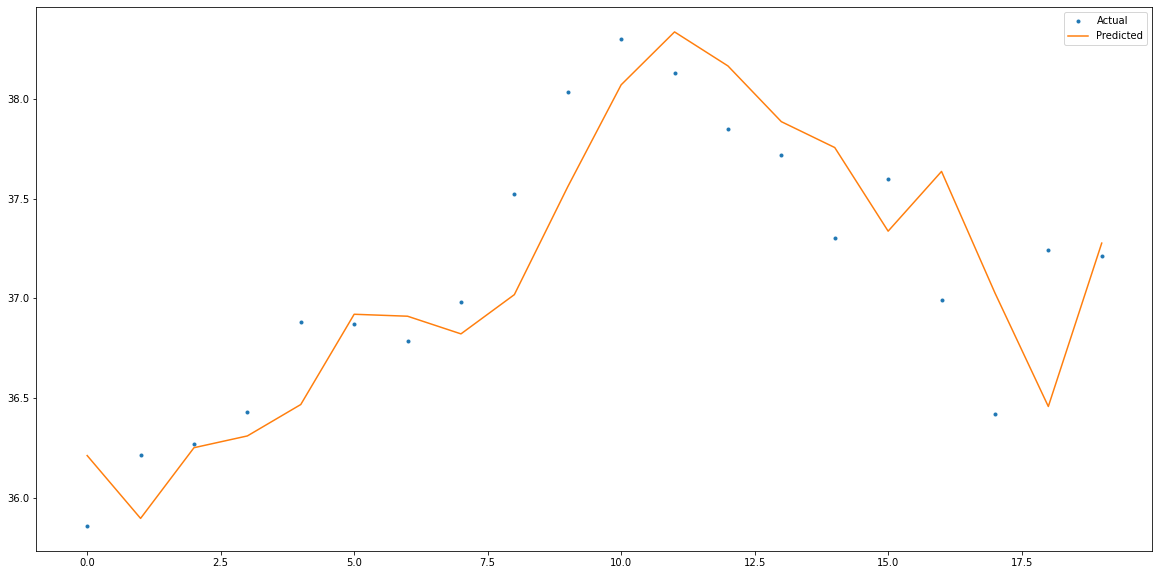

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2007-05-07  42.232778  42.375653  42.173946  42.173946  down
2007-05-08  41.921817  42.022671  41.703298  42.022671  down
2007-05-09  42.224397  42.325251  42.140350  42.274822    up
2007-05-10  42.300035  42.300035  41.753738  41.787357  down
2007-05-11  41.997458  42.089909  41.997458  42.089909    up
...               ...        ...        ...        ...   ...
2021-06-17  37.700001  37.849998  36.570000  36.990002  down
2021-06-18  36.730000  36.810001  36.090000  36.419998  down
2021-06-21  36.730000  37.279999  36.540001  37.240002    up
2021-06-22  37.320000  37.320000  36.900002  37.209999  down
2021-06-23  37.259998  37.470001  37.150002  37.240002    up

[3559 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.8182
roc-auc: 0.9917
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.75      1.00      0.86        12

    accuracy                           0.82        22
   macro avg       0.88      0.80      0.80        22
weighted avg       0.86      0.82      0.81        22



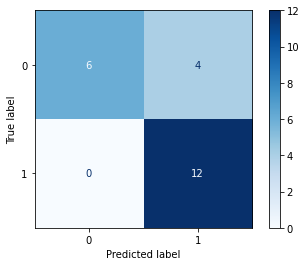

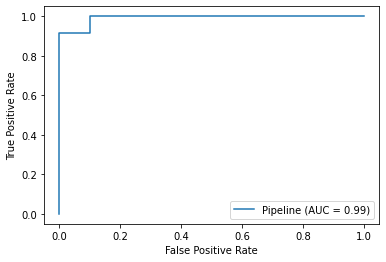

In [18]:
rem_result = etf()

### REZ

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
rez
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2007-05-04  27.968724  27.968724  27.815081  ...        0.0           0.0     REZ
2007-05-07  27.923201  27.923201  27.923201  ...        0.0           0.0     REZ
2007-05-08  27.974421  27.974421  27.974421  ...        0.0           0.0     REZ
2007-05-09  27.934580  27.934580  27.934580  ...        0.0           0.0     REZ
2007-05-10  28.281707  28.281707  28.105301  ...        0.0           0.0     REZ
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  83.379997  83.690002  82.959999  ...        0.0           0.0     REZ
2021-06-18  83.169998  83.690002  82.190002  ...        0.0           0.0     REZ
2021-06-21  82.629997  84.300003  82.379997  ...        0.0           0.0     REZ
2021-06-22  84.250000  84.389999  83.870003  ...        0.0           0.0     REZ
2021-06-23  84.019997  84.510002  83.650002  ...        0.0           0.0     REZ

[3560 rows x 8 columns]

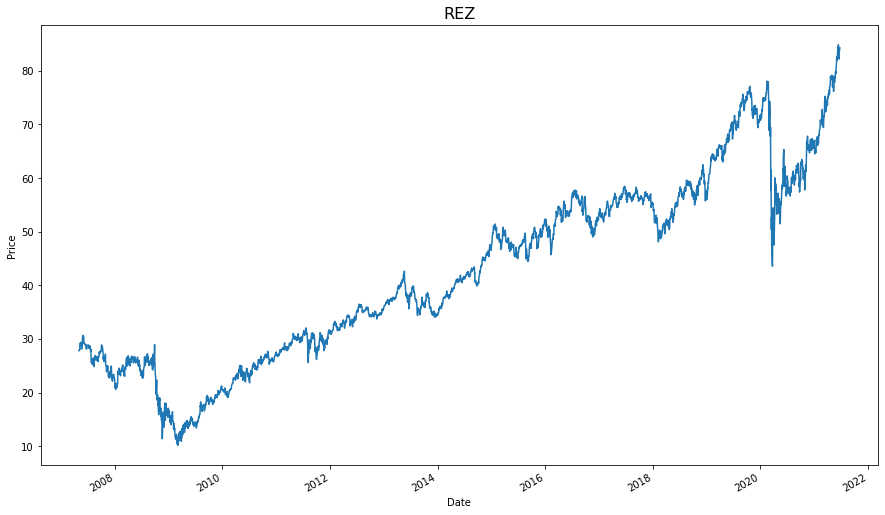

MAE: 0.6168
RMSE: 0.7959
R^2: 0.7717


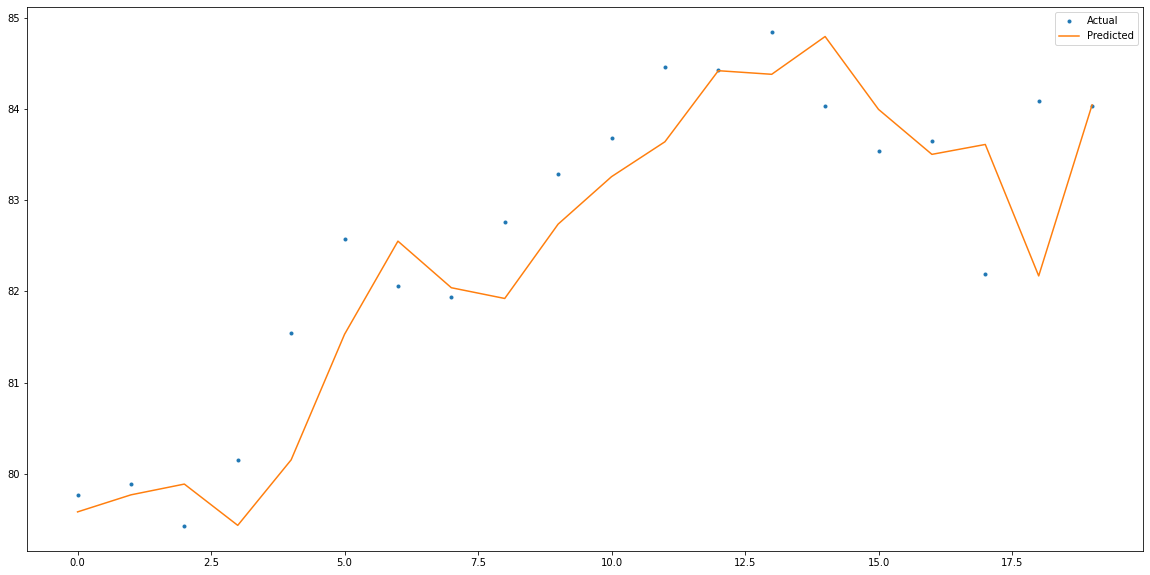

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2007-05-07  27.923201  27.923201  27.923201  27.923201    up
2007-05-08  27.974421  27.974421  27.974421  27.974421    up
2007-05-09  27.934580  27.934580  27.934580  27.934580  down
2007-05-10  28.281707  28.281707  28.105301  28.105301    up
2007-05-11  29.038536  29.129583  28.930417  29.129583    up
...               ...        ...        ...        ...   ...
2021-06-17  83.379997  83.690002  82.959999  83.650002    up
2021-06-18  83.169998  83.690002  82.190002  82.190002  down
2021-06-21  82.629997  84.300003  82.379997  84.089996    up
2021-06-22  84.250000  84.389999  83.870003  84.040001  down
2021-06-23  84.019997  84.510002  83.650002  84.309998    up

[3559 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.9091
roc-auc: 0.9643
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.86      0.92        14

    accuracy                           0.91        22
   macro avg       0.90      0.93      0.91        22
weighted avg       0.93      0.91      0.91        22



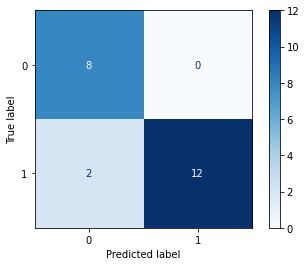

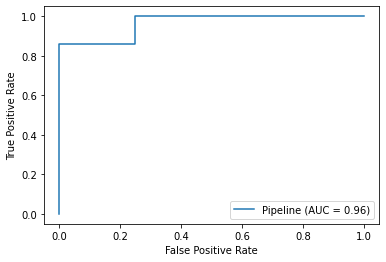

In [19]:
rez_result = etf()

### KBWY

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
kbwy
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2010-12-02  12.456609  12.587255  12.456609  ...      0.000           0.0    KBWY
2010-12-03  12.692774  12.692774  12.537004  ...      0.000           0.0    KBWY
2010-12-06  12.587255  12.587255  12.587255  ...      0.000           0.0    KBWY
2010-12-07  12.642528  12.778199  12.642528  ...      0.000           0.0    KBWY
2010-12-08  12.727948  12.727948  12.562128  ...      0.000           0.0    KBWY
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  23.612750  23.612750  23.174741  ...      0.000           0.0    KBWY
2021-06-18  23.244424  23.294198  22.667047  ...      0.000           0.0    KBWY
2021-06-21  22.799999  23.320000  22.740000  ...      0.103           0.0    KBWY
2021-06-22  23.250000  23.290001  23.020000  ...      0.000           0.0    KBWY
2021-06-23  23.180000  23.230000  23.090000  ...      0.000           0.0    KBWY

[2657 rows x 8 columns]

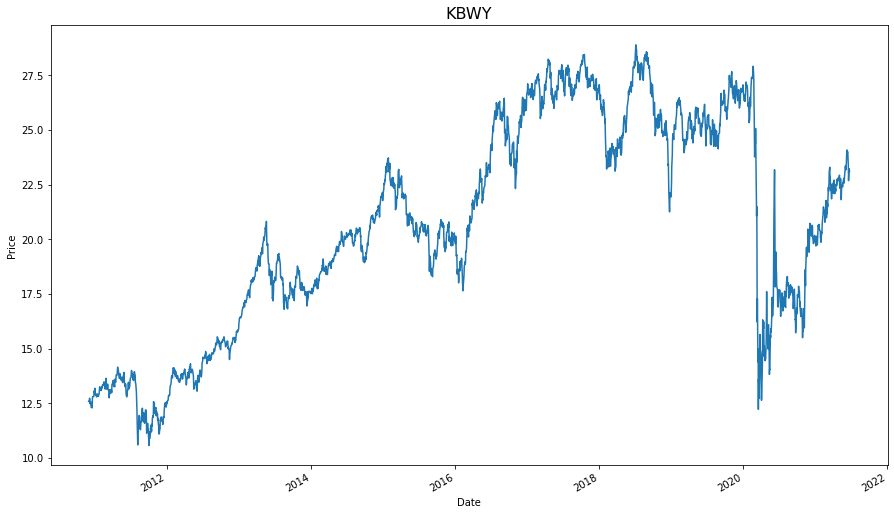

MAE: 0.2169
RMSE: 0.2720
R^2: 0.6668


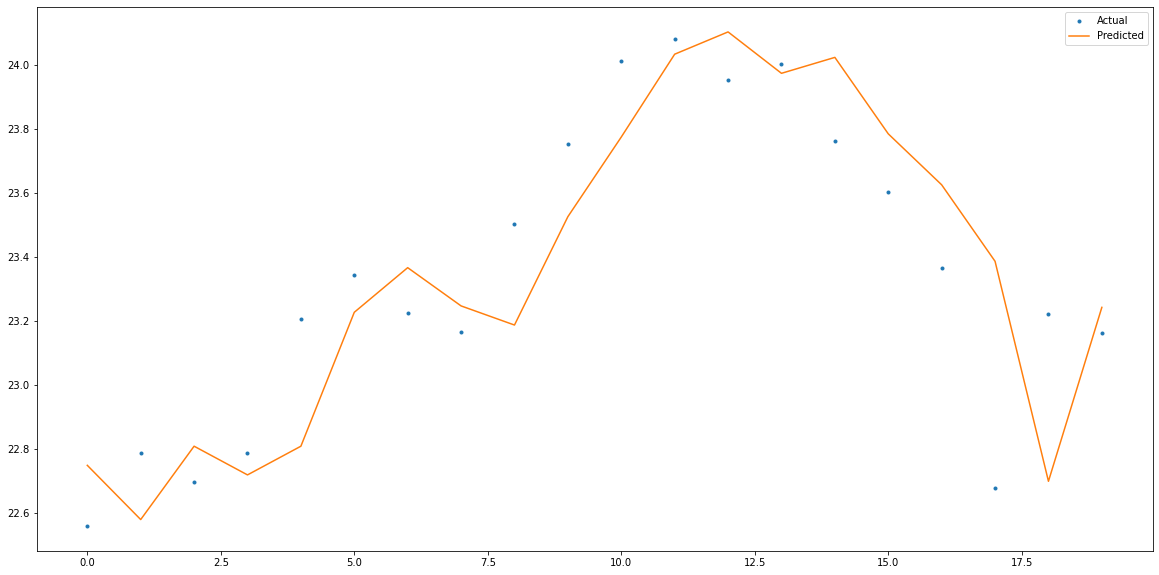

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2010-12-03  12.692774  12.692774  12.537004  12.582228  down
2010-12-06  12.587255  12.587255  12.587255  12.587255    up
2010-12-07  12.642528  12.778199  12.642528  12.727950    up
2010-12-08  12.727948  12.727948  12.562128  12.562128  down
2010-12-09  12.501823  12.506848  12.476699  12.476699  down
...               ...        ...        ...        ...   ...
2021-06-17  23.612750  23.612750  23.174741  23.363880  down
2021-06-18  23.244424  23.294198  22.667047  22.677002  down
2021-06-21  22.799999  23.320000  22.740000  23.219999    up
2021-06-22  23.250000  23.290001  23.020000  23.160000  down
2021-06-23  23.180000  23.230000  23.090000  23.100000  down

[2656 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.5000
roc-auc: 0.9669
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.50      1.00      0.67        11

    accuracy                           0.50        22
   macro avg       0.25      0.50      0.33        22
weighted avg       0.25      0.50      0.33        22



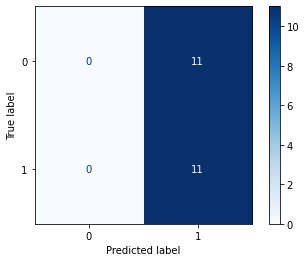

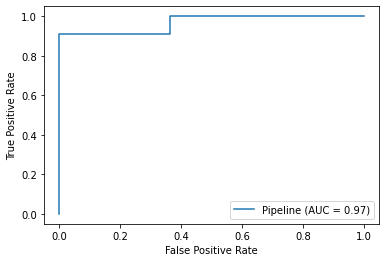

In [20]:
kbwy_result = etf()

### MORT

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
mort
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2011-08-17  10.161433  10.771119  10.120787  ...        0.0           0.0    MORT
2011-08-18  10.198013  10.198013   9.754975  ...        0.0           0.0    MORT
2011-08-19   9.746848   9.852527   9.633040  ...        0.0           0.0    MORT
2011-08-22   9.754975   9.791556   9.551746  ...        0.0           0.0    MORT
2011-08-23  10.157372  10.157372   9.677752  ...        0.0           0.0    MORT
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  20.240000  20.299999  19.629999  ...        0.0           0.0    MORT
2021-06-18  19.730000  19.740000  19.360001  ...        0.0           0.0    MORT
2021-06-21  19.690001  19.990000  19.590000  ...        0.0           0.0    MORT
2021-06-22  19.969999  20.000000  19.780001  ...        0.0           0.0    MORT
2021-06-23  19.980000  20.100000  19.920000  ...        0.0           0.0    MORT

[2479 rows x 8 columns]

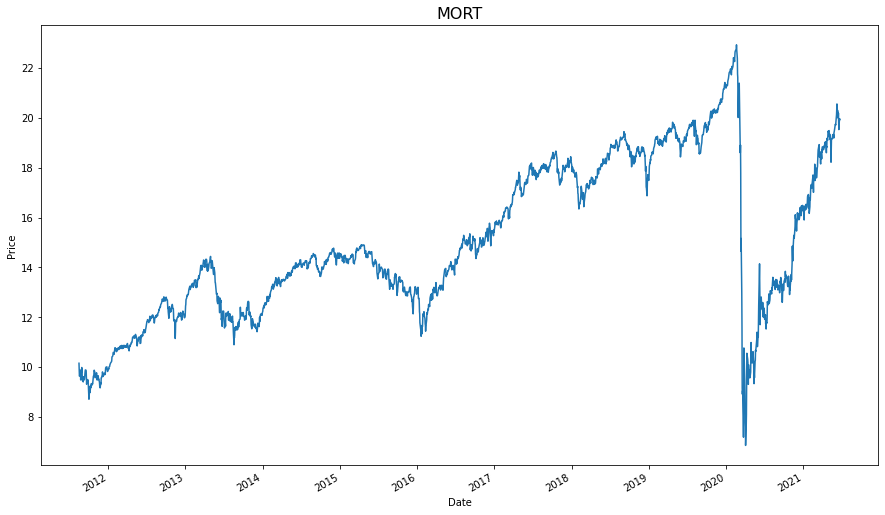

MAE: 0.1713
RMSE: 0.2102
R^2: 0.6837


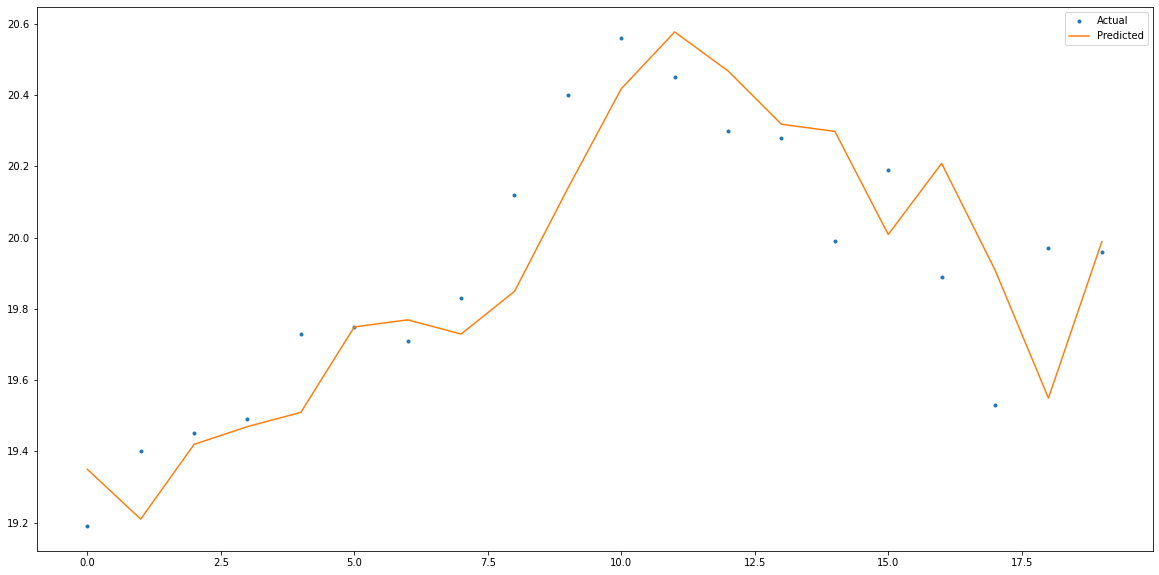

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2011-08-18  10.198013  10.198013   9.754975   9.803750  down
2011-08-19   9.746848   9.852527   9.633040   9.633040  down
2011-08-22   9.754975   9.791556   9.551746   9.673683    up
2011-08-23  10.157372  10.157372   9.677752   9.876916    up
2011-08-24  10.031364  10.031364   9.689940   9.783425  down
...               ...        ...        ...        ...   ...
2021-06-17  20.240000  20.299999  19.629999  19.889999  down
2021-06-18  19.730000  19.740000  19.360001  19.530001  down
2021-06-21  19.690001  19.990000  19.590000  19.969999    up
2021-06-22  19.969999  20.000000  19.780001  19.959999  down
2021-06-23  19.980000  20.100000  19.920000  19.930000  down

[2478 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.5455
roc-auc: 0.9667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.55      1.00      0.71        12

    accuracy                           0.55        22
   macro avg       0.27      0.50      0.35        22
weighted avg       0.30      0.55      0.39        22



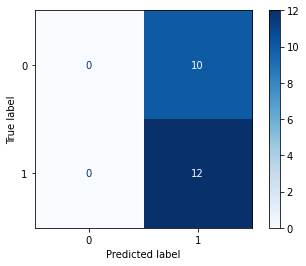

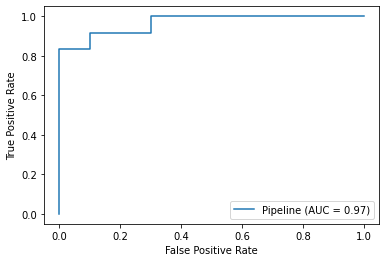

In [21]:
mort_result = etf()

### PSR

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
psr
This dataframe's index is in datatime64? True


Open        High         Low  ...  Dividends  Stock Splits  Ticker
Date                                            ...                                 
2008-11-21   14.898399   15.373638   14.898399  ...      0.000           0.0     PSR
2008-11-24   15.373638   15.373638   15.373638  ...      0.000           0.0     PSR
2008-11-25   15.373638   15.373638   15.373638  ...      0.000           0.0     PSR
2008-11-26   15.373638   15.373638   15.373638  ...      0.000           0.0     PSR
2008-11-28   15.373638   15.373638   15.373638  ...      0.000           0.0     PSR
...                ...         ...         ...  ...        ...           ...     ...
2021-06-17  104.146797  104.415016  103.799113  ...      0.000           0.0     PSR
2021-06-18  103.650106  103.918325  102.915001  ...      0.000           0.0     PSR
2021-06-21  103.129997  104.930000  103.129997  ...      0.685           0.0     PSR
2021-06-22  104.919998  104.919998  104.129997  ...      0.000           0.0     PSR
2021-06-23  104.010002  104.430000  103.959999  ...      0.000           0.0     PSR

[3167 rows x 8 columns]

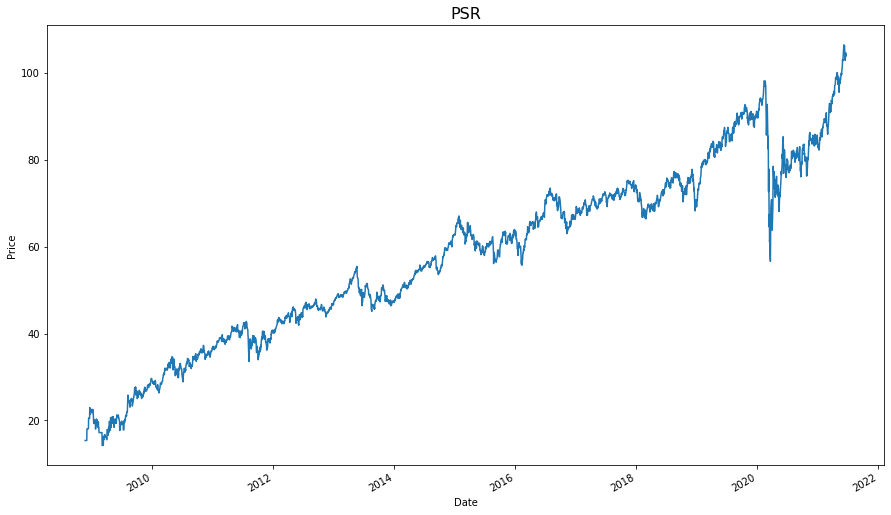

MAE: 0.7456
RMSE: 0.9241
R^2: 0.8200


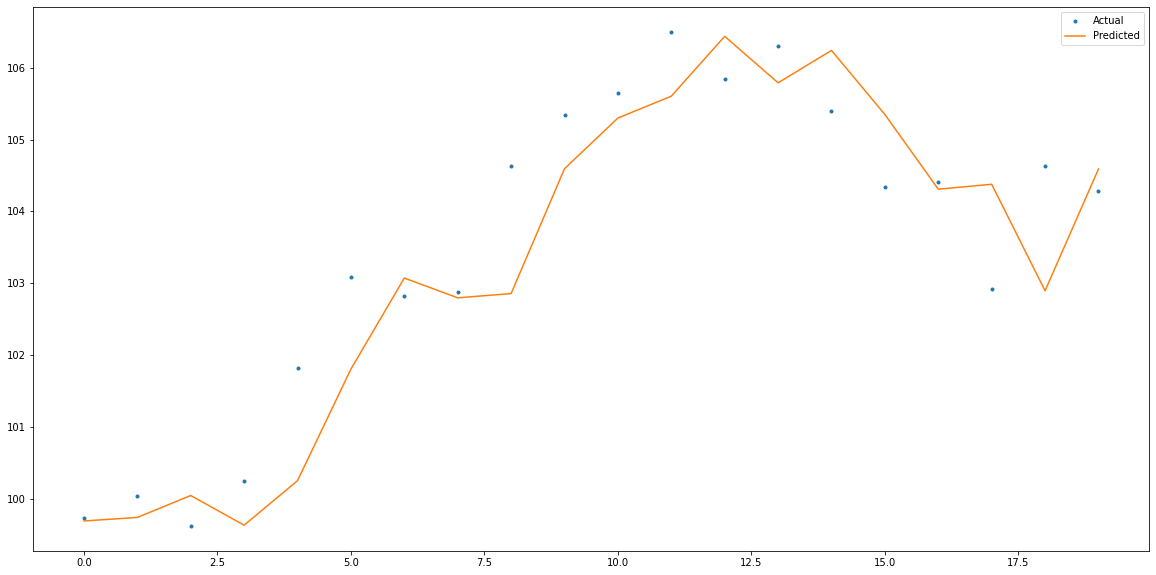

This dataframe's index is in datatime64? True


Open        High         Low       Close Trend
Date                                                            
2008-11-24   15.373638   15.373638   15.373638   15.373638  down
2008-11-25   15.373638   15.373638   15.373638   15.373638  down
2008-11-26   15.373638   15.373638   15.373638   15.373638  down
2008-11-28   15.373638   15.373638   15.373638   15.373638  down
2008-12-01   15.373638   15.373638   15.373638   15.373638  down
...                ...         ...         ...         ...   ...
2021-06-17  104.146797  104.415016  103.799113  104.415016    up
2021-06-18  103.650106  103.918325  102.915001  102.915001  down
2021-06-21  103.129997  104.930000  103.129997  104.629997    up
2021-06-22  104.919998  104.919998  104.129997  104.279999  down
2021-06-23  104.010002  104.430000  103.959999  103.959999  down

[3166 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.9091
roc-auc: 0.9107
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.88      1.00      0.93        14

    accuracy                           0.91        22
   macro avg       0.94      0.88      0.90        22
weighted avg       0.92      0.91      0.91        22



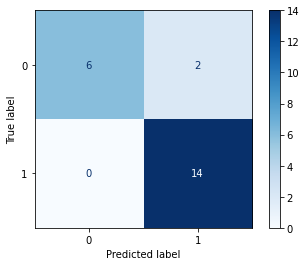

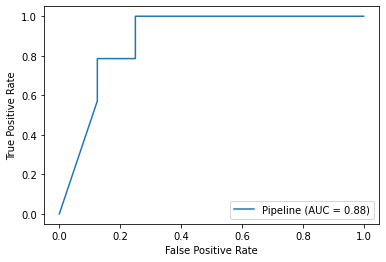

In [22]:
psr_result = etf()

### FRI

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
fri
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2007-05-10  13.840371  13.840371  13.792315  ...        0.0           0.0     FRI
2007-05-11  13.874696  13.874696  13.806044  ...        0.0           0.0     FRI
2007-05-14  13.888428  13.902159  13.792315  ...        0.0           0.0     FRI
2007-05-15  13.806046  13.806046  13.620684  ...        0.0           0.0     FRI
2007-05-16  13.606949  13.606949  13.421586  ...        0.0           0.0     FRI
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  28.500000  28.530001  28.360001  ...        0.0           0.0     FRI
2021-06-18  28.360001  28.389999  28.000000  ...        0.0           0.0     FRI
2021-06-21  28.090000  28.680000  28.090000  ...        0.0           0.0     FRI
2021-06-22  28.610001  28.610001  28.450001  ...        0.0           0.0     FRI
2021-06-23  28.540001  28.580000  28.440001  ...        0.0           0.0     FRI

[3556 rows x 8 columns]

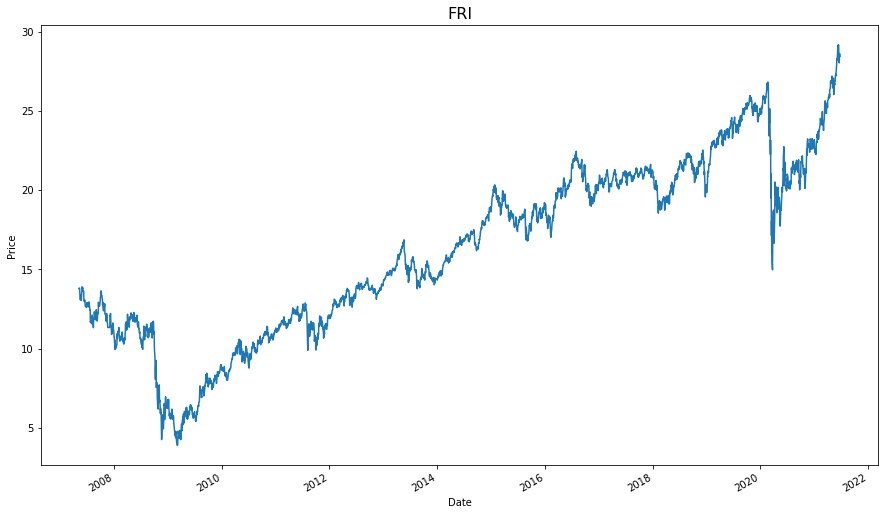

MAE: 0.2157
RMSE: 0.2750
R^2: 0.8014


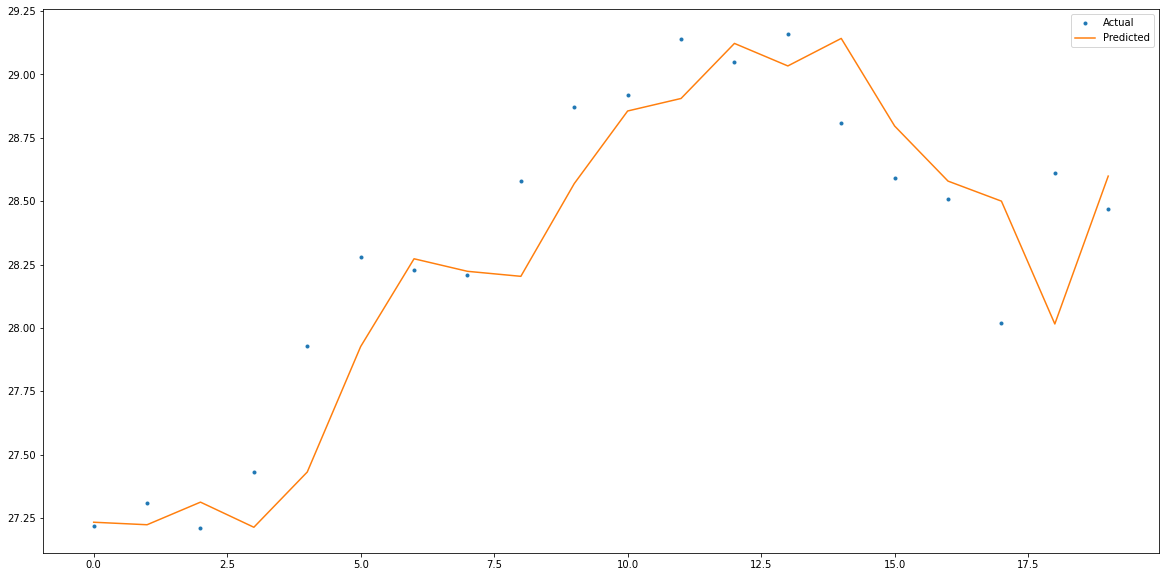

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2007-05-11  13.874696  13.874696  13.806044  13.826639    up
2007-05-14  13.888428  13.902159  13.792315  13.792315  down
2007-05-15  13.806046  13.806046  13.620684  13.620684  down
2007-05-16  13.606949  13.606949  13.421586  13.449048  down
2007-05-17  13.263684  13.263684  13.256819  13.256819  down
...               ...        ...        ...        ...   ...
2021-06-17  28.500000  28.530001  28.360001  28.510000  down
2021-06-18  28.360001  28.389999  28.000000  28.020000  down
2021-06-21  28.090000  28.680000  28.090000  28.610001    up
2021-06-22  28.610001  28.610001  28.450001  28.469999  down
2021-06-23  28.540001  28.580000  28.440001  28.440001  down

[3555 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.5000
roc-auc: 0.9669
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.50      1.00      0.67        11

    accuracy                           0.50        22
   macro avg       0.25      0.50      0.33        22
weighted avg       0.25      0.50      0.33        22



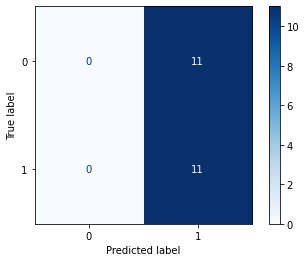

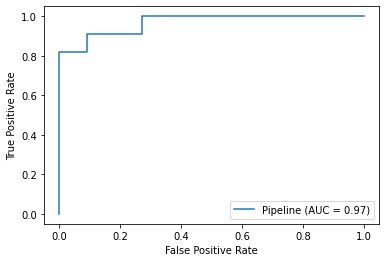

In [23]:
fri_result = etf()

### ROOF

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
roof
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2011-06-14  11.607101  11.681873  11.595597  ...      0.000           0.0    ROOF
2011-06-15  11.578343  11.578343  11.388535  ...      0.000           0.0    ROOF
2011-06-16  11.607097  11.641607  11.474806  ...      0.000           0.0    ROOF
2011-06-17  11.676122  11.762399  11.653115  ...      0.000           0.0    ROOF
2011-06-20  11.710632  11.796908  11.710632  ...      0.000           0.0    ROOF
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  26.663799  26.683624  26.217752  ...      0.000           0.0    ROOF
2021-06-18  26.197927  26.197927  25.851000  ...      0.000           0.0    ROOF
2021-06-21  26.020000  26.540001  26.020000  ...      0.229           0.0    ROOF
2021-06-22  26.459999  26.459999  26.180000  ...      0.000           0.0    ROOF
2021-06-23  26.240000  26.420000  26.070000  ...      0.000           0.0    ROOF

[2524 rows x 8 columns]

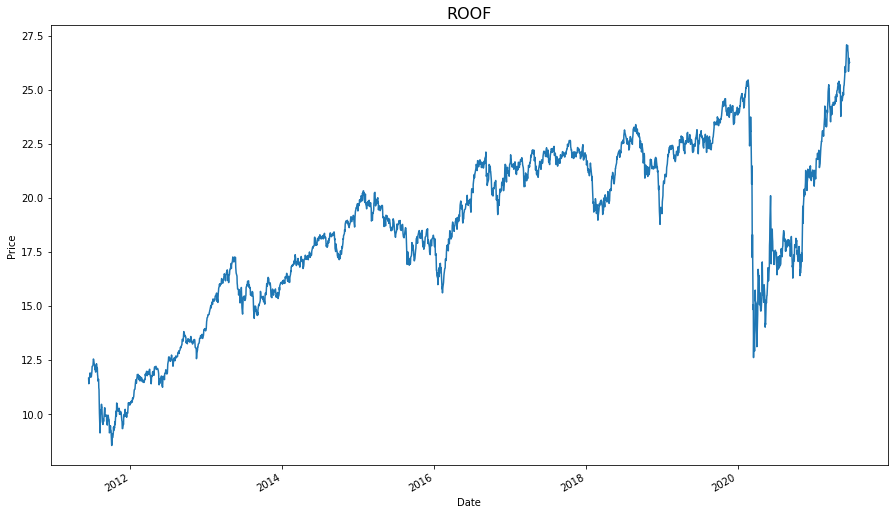

MAE: 0.2586
RMSE: 0.3325
R^2: 0.7792


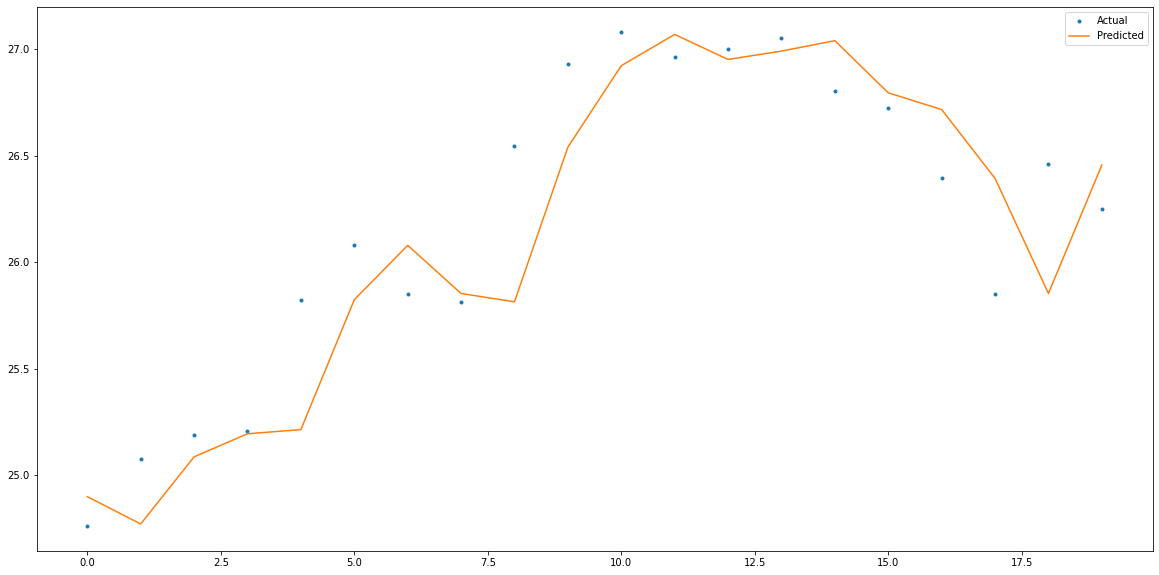

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2011-06-15  11.578343  11.578343  11.388535  11.405790  down
2011-06-16  11.607097  11.641607  11.474806  11.566834    up
2011-06-17  11.676122  11.762399  11.653115  11.658867    up
2011-06-20  11.710632  11.796908  11.710632  11.762398    up
2011-06-21  11.865927  11.906191  11.837169  11.906191    up
...               ...        ...        ...        ...   ...
2021-06-17  26.663799  26.683624  26.217752  26.396170  down
2021-06-18  26.197927  26.197927  25.851000  25.851000  down
2021-06-21  26.020000  26.540001  26.020000  26.459999    up
2021-06-22  26.459999  26.459999  26.180000  26.250000  down
2021-06-23  26.240000  26.420000  26.070000  26.270000    up

[2523 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.5909
roc-auc: 1.0000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.59      1.00      0.74        13

    accuracy                           0.59        22
   macro avg       0.30      0.50      0.37        22
weighted avg       0.35      0.59      0.44        22



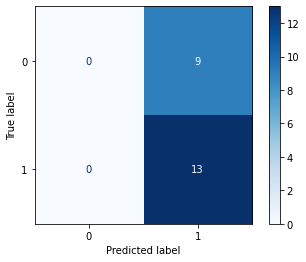

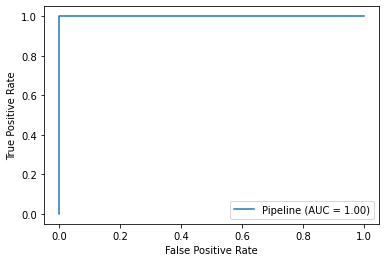

In [24]:
roof_result = etf()

### RDOG

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
rdog
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2008-05-22  28.424102  28.430024  28.382639  ...      0.000           0.0    RDOG
2008-05-23  28.424111  28.424111  28.341188  ...      0.000           0.0    RDOG
2008-05-27  28.193108  28.193108  28.193108  ...      0.000           0.0    RDOG
2008-05-28  28.400418  28.400418  28.329344  ...      0.000           0.0    RDOG
2008-05-29  28.240491  28.400410  28.240491  ...      0.000           0.0    RDOG
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17  48.520000  48.520000  48.160000  ...      0.473           0.0    RDOG
2021-06-18  47.889999  47.889999  47.459999  ...      0.000           0.0    RDOG
2021-06-21  47.560001  48.400002  47.560001  ...      0.000           0.0    RDOG
2021-06-22  48.020000  48.680000  48.020000  ...      0.000           0.0    RDOG
2021-06-23  48.240002  48.330002  48.200001  ...      0.000           0.0    RDOG

[3295 rows x 8 columns]

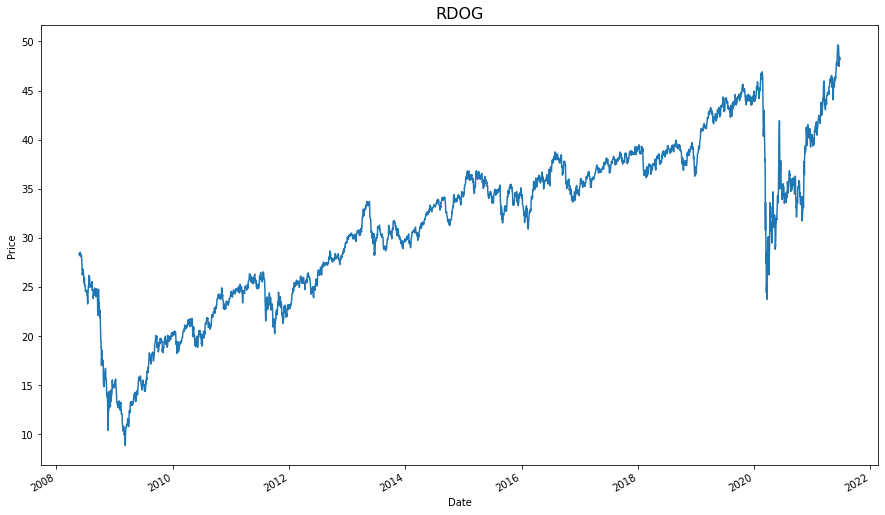

MAE: 0.4257
RMSE: 0.5294
R^2: 0.7784


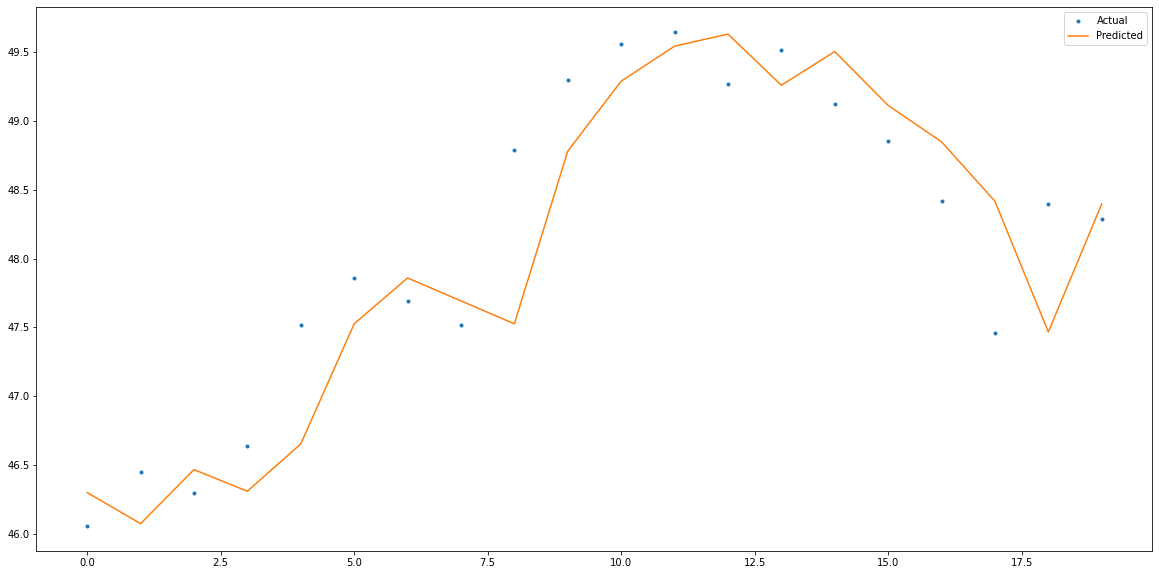

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2008-05-23  28.424111  28.424111  28.341188  28.341188  down
2008-05-27  28.193108  28.193108  28.193108  28.193108  down
2008-05-28  28.400418  28.400418  28.329344  28.370804    up
2008-05-29  28.240491  28.400410  28.240491  28.400410    up
2008-05-30  28.566254  28.566254  28.341183  28.536640    up
...               ...        ...        ...        ...   ...
2021-06-17  48.520000  48.520000  48.160000  48.419998  down
2021-06-18  47.889999  47.889999  47.459999  47.459999  down
2021-06-21  47.560001  48.400002  47.560001  48.400002    up
2021-06-22  48.020000  48.680000  48.020000  48.290001  down
2021-06-23  48.240002  48.330002  48.200001  48.200001  down

[3294 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.6364
roc-auc: 0.7025
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.62      0.73      0.67        11

    accuracy                           0.64        22
   macro avg       0.64      0.64      0.63        22
weighted avg       0.64      0.64      0.63        22



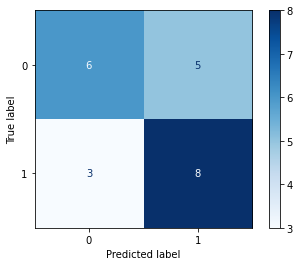

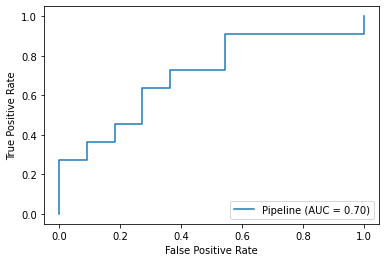

In [25]:
rdog_result = etf()

### REK

Select one REIT ETF from the following list: 

1. VNQ
2. IYR
3. SCHH
4. ICF
5. USRT
6. RWR
7. REM
8. REZ
9. KBWY
10. MORT
11. PSR
12. FRI
13. ROOF
14. RDOG
15. REK


Which REIT ETF do you want to predict? 
rek
This dataframe's index is in datatime64? True


Open       High        Low  ...  Dividends  Stock Splits  Ticker
Date                                         ...                                 
2010-03-18  48.618335  48.618335  48.264321  ...        0.0           0.0     REK
2010-03-19  48.460994  49.178862  48.460994  ...        0.0           0.0     REK
2010-03-22  49.523048  49.523048  48.470831  ...        0.0           0.0     REK
2010-03-23  48.519999  48.883849  48.519999  ...        0.0           0.0     REK
2010-03-24  48.756012  48.756012  48.756012  ...        0.0           0.0     REK
...               ...        ...        ...  ...        ...           ...     ...
2021-06-17   9.280000   9.290000   9.220000  ...        0.0           0.0     REK
2021-06-18   9.330000   9.370000   9.270000  ...        0.0           0.0     REK
2021-06-21   9.320000   9.320000   9.170000  ...        0.0           0.0     REK
2021-06-22   9.160000   9.230000   9.160000  ...        0.0           0.0     REK
2021-06-23   9.200000   9.260000   9.200000  ...        0.0           0.0     REK

[2837 rows x 8 columns]

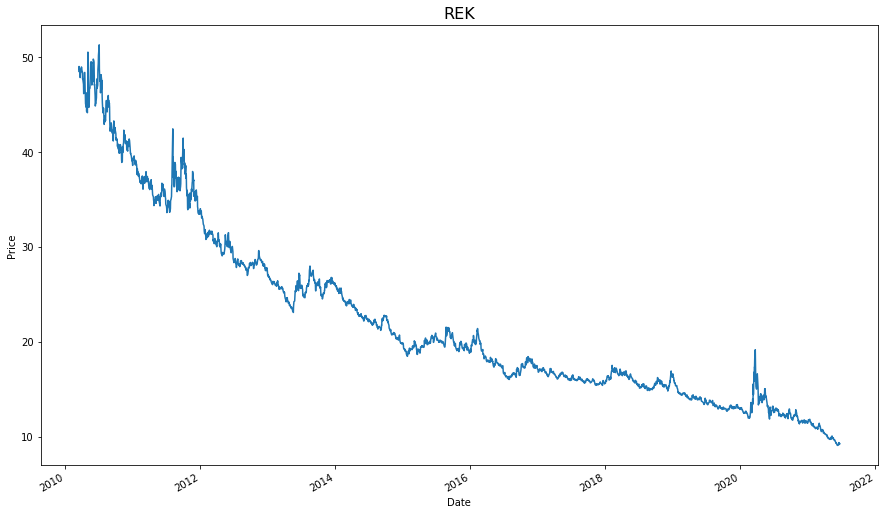

MAE: 0.0667
RMSE: 0.0840
R^2: 0.7750


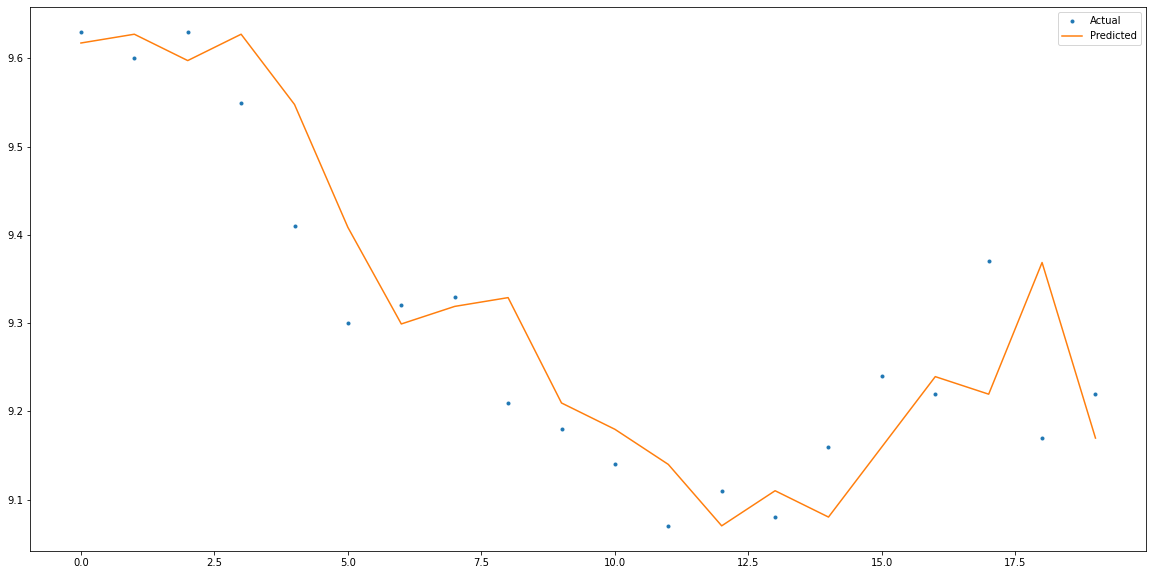

This dataframe's index is in datatime64? True


Open       High        Low      Close Trend
Date                                                        
2010-03-19  48.460994  49.178862  48.460994  49.031357    up
2010-03-22  49.523048  49.523048  48.470831  48.638004  down
2010-03-23  48.519999  48.883849  48.519999  48.756012    up
2010-03-24  48.756012  48.756012  48.756012  48.756012  down
2010-03-25  48.205315  48.274152  47.772629  47.861130  down
...               ...        ...        ...        ...   ...
2021-06-17   9.280000   9.290000   9.220000   9.220000  down
2021-06-18   9.330000   9.370000   9.270000   9.370000    up
2021-06-21   9.320000   9.320000   9.170000   9.170000  down
2021-06-22   9.160000   9.230000   9.160000   9.220000    up
2021-06-23   9.200000   9.260000   9.200000   9.260000    up

[2836 rows x 5 columns]

Test
-*-*-*-*-*-*-*-*
accuracy: 0.4545
roc-auc: 0.9667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.45      1.00      0.62        10

    accuracy                           0.45        22
   macro avg       0.23      0.50      0.31        22
weighted avg       0.21      0.45      0.28        22



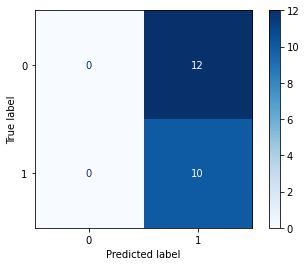

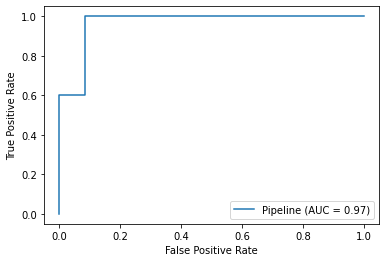

In [26]:
rek_result = etf()

## VII. Evaluation

|  Model | MAE | RMSE | R^2 | Accuracy | F1(0) | F1(1) |
| :---: | :---: |:---: | :---: | :---: | :---: | :---: |
| VNQ | 0.7428 | 0.9558 | 0.7745 | 0.9091 | 0.90 | 0.92 |
| IYR | 0.7270 | 0.9093 | 0.7625 | 0.9545 | 0.94 | 0.96 |
| SCHH | 0.3357 | 0.4200 | 0.7898 | 0.9091 | 0.88 | 0.93 |
| ICF | 0.4905 | 0.6060 | 0.8156 | 0.7727 | 0.74 | 0.80 |
| USRT | 0.4583 | 0.5822 | 0.7924 | 0.9545 | 0.96 | 0.95 | 
| RWR | 0.8593 | 1.0842 | 0.7514 | 0.9545 | 0.95 | 0.96 |
| REM | 0.3137 | 0.3766 | 0.6832 | 0.8182 | 0.75 | 0.86 |
| REZ | 0.6168 | 0.7959| 0.7717| 0.9091 | 0.89 | 0.92 |
| KBWY | 0.2169 | 0.2720 | 0.6668 | 0.5000 | 0.00 | 0.67 |
| MORT | 0.1713 | 0.2102 | 0.6837 | 0.5455 | 0.00 | 0.71 |
| PSR | 0.7456 | 0.9241 | 0.8200 | 0.9091 | 0.86 | 0.93 |
| FRI | 0.2157 | 0.2750 | 0.8014 | 0.5000 | 0.00 | 0.67 |
| ROOF | 0.2586 | 0.3325 | 0.7792 | 0.5909 | 0.00 | 0.74 |
| RDOG | 0.4257 | 0.5294 | 0.7784 | 0.6364 | 0.60 | 0.67 |
| REK | 0.0667 | 0.0840 | 0.7750 | 0.4545 | 0.00 | 0.62 |


Regression
- The best LSTM model was applied to 15 REIT ETFs' test set. By looking at the MAE and RMSE, LSTM can handle forecasting well by maintain small predition errors. 
    - This could be due to the nature of LSTM. LSTM choose to remember relevant information and forget irrelevants during sequences processing 

Clssification
- The best NuSVC classifier was applied to 15 REIT ETFs' test set. By looking at the test accuracy, only 9 of 15 ETFs have acceptable results
    - This could be due to the nature of NuSVC classifier. For binary classification, NuSVC creates a hyperplane to separate different classes. The test size contains 22 days from 5/24/2021 to 6/23/2021. 15 ETFs' were in different price ranges. Those have a closer price range with VNQ are more likely to generate good results. In contrast, those price range far away from VNQ generate results that could below the expectation

## VIII. Conclusion

By analyzing VNQ time series, the LSTM model was selected for regression and the NuSVC model was selected for classification. Both models were applied to the rest of the 14 REIT ETFs to see how the model is generalizable for different time series. LSTM is a good fit for price prediction no matter the time series has either an increasing trend or a decreasing trend. NuSVC is more like to fit for time series which have a closer price range with VNQ.

### Recommendation
- <b>Update</b>: Update the model periodically so that the model can learn new pattern

### Future Work
Further analysis can be explored on the following to provide additional insights and improve the model performance.
- <b>Buy/Hold/Sell</b>: Create an alert when the prediction reaches certain point
- <b>Market Sentiment</b>: Web scrapping on social media to gather market information 
- <b>Extensive application</b>: Further develop models for other investment products with time series based
- <b>Model Deployment</b>: Automaticaly fetch new historical data, and run models for prediction